<a href="https://colab.research.google.com/github/rudolfbob/EVDA/blob/main/EVDA_project22_UTS_dataFromKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

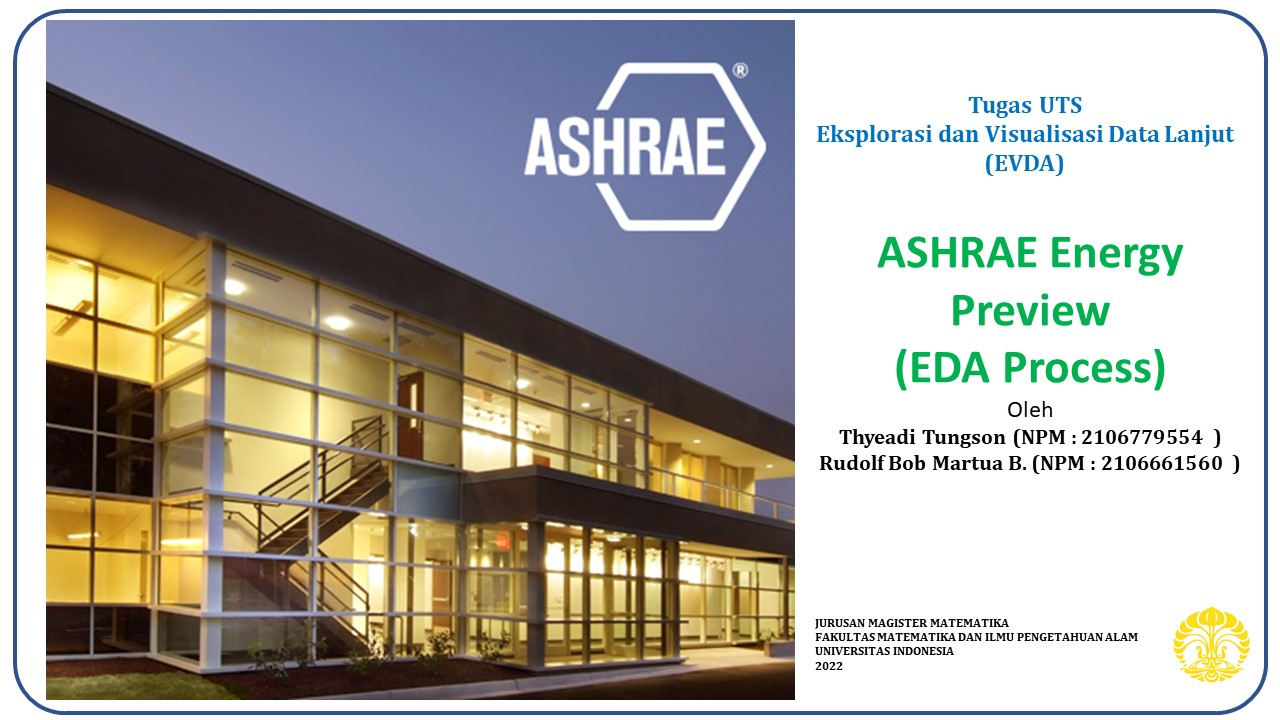

# **PENDAHULUAN**

Pengolahan EDA data kali ini berasal dari kompetisi ASHRAE Great Energy predictor III yang diadakan pada September 2019. ASHRAE (American Society of Heating, Refrigerating and Air-Conditioning Engineers) didirikan pada tahun 1894, adalah masyarakat global yang memajukan kesejahteraan manusia melalui teknologi berkelanjutan untuk lingkungan. Kompetisi tersebut diadakan untuk membuat model prediksi konsumsi energi untuk 4 jenis meter yang berbeda (Uap, Listrik, Air Dingin, Air Panas), tapi pada penugasan UTS kali ini hanya akan dilakukan proses EDA dari dataset yang tersedia

# **1. Import Library yang akan digunakan**

In [3]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
import datetime as dt #for timestamp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

# **2. Mengambil Data**

In [4]:
#Data diambil dari kaggle, oleh karena itu perlu menautkan kaggle dengan colabs
!pip install -q kaggle

In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then copy kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


In [6]:
!kaggle competitions download -c ashrae-energy-prediction

 98% 372M/379M [00:01<00:00, 188MB/s]
100% 379M/379M [00:02<00:00, 198MB/s]


In [7]:
!unzip ashrae-energy-prediction.zip

Archive:  ashrae-energy-prediction.zip
  inflating: building_metadata.csv   
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
  inflating: weather_test.csv        
  inflating: weather_train.csv       


In [8]:
#Path dari masing_masing data dari Kaggle yang sudah disimpan di google colabs
meta_path = "/content/building_metadata.csv" 
pwTrain_path = "/content/train.csv"
wtTrain_path = "/content/weather_train.csv"
pwTest_path = "/content/test.csv"
wtTest_path = "/content/weather_test.csv"

In [9]:
#Mount data dengan Pandas
df_meta = pd.read_csv(meta_path) #Dataframe Metadata_Building
df_pwTrain = pd.read_csv(pwTrain_path) #Dataframe train
df_wtTrain = pd.read_csv(wtTrain_path) #Dataframe weather train
df_pwTest = pd.read_csv(pwTest_path) #Dataframe test
df_wtTest = pd.read_csv(wtTest_path) #Dataframe weather test

# **3. Melihat informasi dan deskripsi dari tiap data**

In [10]:
# Informasi dari data train (df_pwTrain)
df_pwTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [11]:
df_pwTrain.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
building_id,20216100.0,799.278000,426.913309,0.0,393.0,895.000,1179.000,1448.0
meter,20216100.0,0.662441,0.930992,0.0,0.0,0.000,1.000,3.0
meter_reading,20216100.0,2117.121076,153235.624995,0.0,18.3,78.775,267.984,21904700.0


In [12]:
df_pwTrain.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [13]:
# Informasi dari data Metadata Bangunan (df_meta)
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [14]:
df_meta.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
site_id,1449.0,6.952381,5.003432,0.0,3.0,5.0,13.0,15.0
building_id,1449.0,724.000000,418.434583,0.0,362.0,724.0,1086.0,1448.0
square_feet,1449.0,92111.776398,110769.950997,283.0,23012.0,57673.0,115676.0,875000.0
year_built,675.0,1967.957037,31.054030,1900.0,1949.0,1970.0,1995.0,2017.0
floor_count,355.0,3.740845,3.333683,1.0,1.0,3.0,5.0,26.0


In [15]:
df_meta.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [16]:
# Informasi dari Data Cuaca Train (df_wtTrain)
df_wtTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [17]:
df_wtTrain.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
site_id,139773.0,7.478977,4.604744,0.0,3.0,7.0,11.0,15.0
air_temperature,139718.0,14.418106,10.626595,-28.9,7.2,15.0,22.2,47.2
cloud_coverage,70600.0,2.149306,2.599150,0.0,0.0,2.0,4.0,9.0
dew_temperature,139660.0,7.350158,9.790235,-35.0,0.6,8.3,14.4,26.1
precip_depth_1_hr,89484.0,0.983047,8.463678,-1.0,0.0,0.0,0.0,343.0
sea_level_pressure,129155.0,1016.158038,7.629684,968.2,1011.8,1016.4,1020.8,1045.5
wind_direction,133505.0,180.526632,111.523629,0.0,80.0,190.0,280.0,360.0
wind_speed,139469.0,3.560527,2.335874,0.0,2.1,3.1,5.0,19.0


In [18]:
df_wtTrain.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


**Data yang terdapat pada tiap file csv**

**train.csv/test.csv:** Berisi id bangunan, id meter, catatan waktu saat pengukuran meteran dilakukan dan pembacaan meter yang merupakan variabel target.
*   building_id — ID dari bangunan.
*   meter — Kode id meter. Dibaca sebagai {0: listrik, 1: air dingin, 2: uap, 3: air panas}. Tidak setiap bangunan memiliki semua jenis id meteran.
*   timestamp — Waktu aat pengukuran dilakukan
*   meter_reading — Variabel target. Konsumsi energi dalam kWh (atau setara)


**weather_train.csv/weather_test.csv:** Data cuaca dari stasiun metrologi yang terdekat dengan lokasi.
*   site_id- id lokasi bangunan
*   air_temperature — Suhu udara dalam derajat Celcius
*   cloud_coverage — Bagian dari langit yang tertutup awan, dalam oktas
*   dew_temperature — Suhu Dew dalam derajat Celcius
*   precip_depth_1_hr — Kedalaman curah hujan dalam Milimeter
*   sea_level_pressure — Tekanan permukaan laut dalamMilibar/hectopascals
*   wind_direction — Arah Angin (0–360)
*   wind_speed — Kecepatan Angin dalam meter per detik

**building_metadata.csv:** Metadata untuk semua bangunan di berbagai tempat.
*   site_id — id lokasi bangunan.
*   building_id — ID gedung untuk join denagn training.csv
*   primary_use — Fungsi atau kegunaan bangunan
*   square_feet — Luas bangunan
*   year_built — Tahun bangunan dibuat
*   floor_count — Jumlah lantai bangunan

# **4. Membuat data lebih ringan, mengurangi pembacaan memory, dan menggabungkan Data**

In [19]:
# Mengubah data menjadi format lebih ringan karena beberapa kerangka data terlalu besar dan membutuhkan waktu lama untuk dimuat
# Metode ini terinspirasi dari notebook kaggle berjudul: ASHRAE: format bulu untuk pemuatan cepat
# Proses ini terinspirasi dari tautan: https://www.kaggle.com/corochann/ashrae-feather-format-for-fast-loading

%%time
df_pwTrain.to_feather('df_pwTrain.feather')
df_pwTest.to_feather('df_pwTest.feather')

df_meta.to_feather('df_meta.feather')

df_wtTrain.to_feather('df_wtTrain.feather')
df_wtTest.to_feather('df_wtTest.feather')

CPU times: user 4.91 s, sys: 2.28 s, total: 7.2 s
Wall time: 6.48 s


In [20]:
%%time
df_pwTrain = pd.read_feather('df_pwTrain.feather')
df_pwTest = pd.read_feather('df_pwTest.feather')

df_meta = pd.read_feather('df_meta.feather')

df_wtTrain = pd.read_feather('df_wtTrain.feather')
df_wtTest = pd.read_feather('df_wtTest.feather')

CPU times: user 3.36 s, sys: 2.32 s, total: 5.68 s
Wall time: 4.21 s


In [21]:
# Fungsi ini membantu dalam mengoptimalkan memori yang digunakan oleh kerangka data dengan memodifikasi/mengubah tipe data setiap kolom.
# Metode ini terinspirasi dari notebook kaggle berjudul: load data (reduce memory usage)
# Proses ini terinspirasi dari tautan: https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

def reduce_mem_usage(df, df_name):

    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:

        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2

    print('Memory usage of {} is reduced by {:.2f} %. Usage dropped from {:.2f} MB to {:.2f} MB.'.format(df_name, (100 * (start_mem - end_mem) / start_mem), start_mem, end_mem))
    
    return df

In [22]:
%%time
df_pwTrain = reduce_mem_usage(df_pwTrain, 'Dataframe Train')
df_pwTest = reduce_mem_usage(df_pwTest, 'Dataframe Test')

df_meta = reduce_mem_usage(df_meta, 'Dataframe Metadata_Building')

df_wtTrain = reduce_mem_usage(df_wtTrain, 'Dataframe Weather Train')
df_wtTest = reduce_mem_usage(df_wtTest, 'Dataframe Weather Test')

Memory usage of Dataframe Train is reduced by 71.82 %. Usage dropped from 616.95 MB to 173.84 MB.
Memory usage of Dataframe Test is reduced by 71.82 %. Usage dropped from 1272.51 MB to 358.53 MB.
Memory usage of Dataframe Metadata_Building is reduced by 73.88 %. Usage dropped from 0.07 MB to 0.02 MB.
Memory usage of Dataframe Weather Train is reduced by 73.06 %. Usage dropped from 9.60 MB to 2.59 MB.
Memory usage of Dataframe Weather Test is reduced by 73.04 %. Usage dropped from 19.04 MB to 5.13 MB.
CPU times: user 5.48 s, sys: 234 ms, total: 5.71 s
Wall time: 5.53 s


In [23]:
%%time
#Menggabungkan Data
#1. Menggabungkan Data Train
df_all_Train = df_pwTrain.merge(df_meta, on='building_id', how='left')
df_all_Train = df_all_Train.merge(df_wtTrain, on=['site_id', 'timestamp'], how='left')

#2. Menggabungkan Data Test
df_all_Test = df_pwTest.merge(df_meta, on='building_id', how='left')
df_all_Test = df_all_Test.merge(df_wtTest, on=['site_id', 'timestamp'], how='left')

CPU times: user 18.6 s, sys: 1.55 s, total: 20.1 s
Wall time: 20.4 s


# **5. Melakukan Pengamatan Awal**
Dalam proses EDA dan preprocesing fitur selain fitur/variabel target akan dilakukan terhadap Gabungan Data Train dan Data Test, tapi dalam preprocessing dan EDA terhadap fitur/variabel target meter _reading akan difokuskan pada Gabungan Data Train saja (df_all_Train)

In [24]:
#Melihat tabel dari dataframe baru
#Tabel dari df_all_Train
df_all_Train.head().transpose()

,0,1,2,3,4
building_id,0,1,2,3,4
meter,0,0,0,0,0
timestamp,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00
meter_reading,0.0,0.0,0.0,0.0,0.0
site_id,0,0,0,0,0
primary_use,Education,Education,Education,Education,Education
square_feet,7432,2720,5376,23685,116607
year_built,2008.0,2004.0,1991.0,2002.0,1975.0
floor_count,NaN,NaN,NaN,NaN,NaN
air_temperature,25.0,25.0,25.0,25.0,25.0


In [25]:
#Tabel dari df_all_Test
df_all_Test.head().transpose()

,0,1,2,3,4
row_id,0,1,2,3,4
building_id,0,1,2,3,4
meter,0,0,0,0,0
timestamp,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00
site_id,0,0,0,0,0
primary_use,Education,Education,Education,Education,Education
square_feet,7432,2720,5376,23685,116607
year_built,2008.0,2004.0,1991.0,2002.0,1975.0
floor_count,NaN,NaN,NaN,NaN,NaN
air_temperature,17.796875,17.796875,17.796875,17.796875,17.796875


In [26]:
df_all_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
 #   Column              Dtype   
---  ------              -----   
 0   building_id         int16   
 1   meter               int8    
 2   timestamp           category
 3   meter_reading       float32 
 4   site_id             int8    
 5   primary_use         category
 6   square_feet         int32   
 7   year_built          float16 
 8   floor_count         float16 
 9   air_temperature     float16 
 10  cloud_coverage      float16 
 11  dew_temperature     float16 
 12  precip_depth_1_hr   float16 
 13  sea_level_pressure  float16 
 14  wind_direction      float16 
 15  wind_speed          float16 
dtypes: category(2), float16(9), float32(1), int16(1), int32(1), int8(2)
memory usage: 790.8 MB


In [27]:
df_all_Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41697600 entries, 0 to 41697599
Data columns (total 16 columns):
 #   Column              Dtype   
---  ------              -----   
 0   row_id              int32   
 1   building_id         int16   
 2   meter               int8    
 3   timestamp           category
 4   site_id             int8    
 5   primary_use         category
 6   square_feet         int32   
 7   year_built          float16 
 8   floor_count         float16 
 9   air_temperature     float16 
 10  cloud_coverage      float16 
 11  dew_temperature     float16 
 12  precip_depth_1_hr   float16 
 13  sea_level_pressure  float16 
 14  wind_direction      float16 
 15  wind_speed          float16 
dtypes: category(2), float16(9), int16(1), int32(2), int8(2)
memory usage: 1.6 GB


In [28]:
#Melihat Bentuk gabungan dari data
print('Bentuk gabungan Data Train:',df_all_Train.shape)
print('Bentuk gabungan Data Test:', df_all_Test.shape)

Bentuk gabungan Data Train: (20216100, 16)
Bentuk gabungan Data Test: (41697600, 16)


Dari pengamatan di atas kita ketahui bahwa untuk data gabungan 

*   Train terdiri 20.216.100 baris dan 16 kolom dan untuk data untuk data Test terdapat 41.697.600 baris dan 16 kolom.
Untuk gabungan data Test lebih banyak karena merupakan data dari 2 tahun (2017-2018) sedangkan pada gabungan data Test lebih sedikit karena hanya data dari 1 tahun (2016)
*  Ketika kita melihat head dari data Train dan data Test, terlihat ada data dengan nilai NaN, artinya tidak ada data pencatatan, sehingga diasumsikan bahwa kemungkinan ada fitur/variabel yang memiliki *missing value*. Oleh karena itu kita harus lihat *missing value* dari masing masing gabungan data Train dan Test
*   Ketika kita melihat tipe data ada 2 fitur/variabel yang masih merupakan category yaitu timestamp dan primary_use. untuk fitur/variabel timestamp karena kita nantinya akan mengamati penggunaan daya (pembacaan meter) dalam kurun waktu tertentu, maka nantinya akan dikonversi 



In [29]:
#Check null values pada ddata train gabungan
df_all_Train.isnull().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12127645
floor_count           16709167
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction         1449048
wind_speed              143676
dtype: int64

In [30]:
#Check null values pada ddata train gabungan
df_all_Test.isnull().sum()

row_id                       0
building_id                  0
meter                        0
timestamp                    0
site_id                      0
primary_use                  0
square_feet                  0
year_built            24598080
floor_count           34444320
air_temperature         221901
cloud_coverage        19542180
dew_temperature         260799
precip_depth_1_hr      7801563
sea_level_pressure     2516826
wind_direction         2978663
wind_speed              302089
dtype: int64

dari pengamatan data tak kosong di atas, ternyata ada beberapa data yang memiliki *missing value* sehingga nantinya akan dilihat % *missing value*nya, jika >50% maka fitur/variabel tersebut akan dibuang, jika tidak maka nantinya akan kita imputasi (bisa menggunakan metode mean atau median)

In [31]:
#Melihat apakah ada yang duplikat/sama pada Data Gabungan Train
df_all_Train.duplicated().sum()

0

Tidak ada data duplikat pada Gabungan Data Train, dan untuk cek duplikat di data test tidak dilakukan, karena selalu mengalami *memory crash*

In [32]:
#Sebelum mengexplore lebih lanjut akan ditambahkan fitur tanggal, waktu dalam kumpulan data kami berdasarkan fitur catatan waktu (timestamp) 
#yang diberikan sehingga dapat mengexplore data pada tingkat yang terperinci dan menjelajahi apakah ada pola musiman.
# Code program ini dari tautan: https://gist.github.com/vdhar1992/3fcb42a0856e10aaa647322b12ade294#file-break_datetime-py
def break_datetime(df):
  df['timestamp']= pd.to_datetime(df['timestamp'])
  df['hour']= np.uint8(df['timestamp'].dt.hour)
  df['dayofweek']= np.uint8(df['timestamp'].dt.dayofweek)
  df['month']= np.uint8(df['timestamp'].dt.month)
  df['dayofyear']= np.uint16(df['timestamp'].dt.dayofyear)
  df['day']= np.uint16(df['timestamp'].dt.day)
  df['year']= np.uint16(df['timestamp'].dt.year)
  return df


In [33]:
df_all_Train = break_datetime(df_all_Train)
df_all_Test = break_datetime(df_all_Test)

In [34]:
#Melihat Bentuk gabungan dari data setelah menambahkan fitur tanggal dan waktu
print('Bentuk gabungan Data Train:',df_all_Train.shape)
print('Bentuk gabungan Data Test:', df_all_Test.shape)

Bentuk gabungan Data Train: (20216100, 22)
Bentuk gabungan Data Test: (41697600, 22)


Pada proses break_datetime artinya kita menambah fitur/variabel baru, yang tadinya terdapat 16 fitur/variabel sekarang menjadi 22 dengan menambahkan fitur/variabel hour, dayofweek, month, dayofyear, day, dan year, yang mana tujuan dari ini untuk mempermudah melakukan EDA untuk satuan waktu tertentu

In [35]:
df_all_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 22 columns):
 #   Column              Dtype   
---  ------              -----   
 0   building_id         int16   
 1   meter               int8    
 2   timestamp           category
 3   meter_reading       float32 
 4   site_id             int8    
 5   primary_use         category
 6   square_feet         int32   
 7   year_built          float16 
 8   floor_count         float16 
 9   air_temperature     float16 
 10  cloud_coverage      float16 
 11  dew_temperature     float16 
 12  precip_depth_1_hr   float16 
 13  sea_level_pressure  float16 
 14  wind_direction      float16 
 15  wind_speed          float16 
 16  hour                uint8   
 17  dayofweek           uint8   
 18  month               uint8   
 19  dayofyear           uint16  
 20  day                 uint16  
 21  year                uint16  
dtypes: category(2), float16(9), float32(1), int16(1), int32(1), int8

In [36]:
df_all_Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41697600 entries, 0 to 41697599
Data columns (total 22 columns):
 #   Column              Dtype   
---  ------              -----   
 0   row_id              int32   
 1   building_id         int16   
 2   meter               int8    
 3   timestamp           category
 4   site_id             int8    
 5   primary_use         category
 6   square_feet         int32   
 7   year_built          float16 
 8   floor_count         float16 
 9   air_temperature     float16 
 10  cloud_coverage      float16 
 11  dew_temperature     float16 
 12  precip_depth_1_hr   float16 
 13  sea_level_pressure  float16 
 14  wind_direction      float16 
 15  wind_speed          float16 
 16  hour                uint8   
 17  dayofweek           uint8   
 18  month               uint8   
 19  dayofyear           uint16  
 20  day                 uint16  
 21  year                uint16  
dtypes: category(2), float16(9), int16(1), int32(2), int8(2), uint16(

In [37]:
df_cat = pd.get_dummies(df_all_Train['primary_use'], prefix='Use')
df_cat.head().transpose()

,0,1,2,3,4
Use_Education,1,1,1,1,1
Use_Entertainment/public assembly,0,0,0,0,0
Use_Food sales and service,0,0,0,0,0
Use_Healthcare,0,0,0,0,0
Use_Lodging/residential,0,0,0,0,0
Use_Manufacturing/industrial,0,0,0,0,0
Use_Office,0,0,0,0,0
Use_Other,0,0,0,0,0
Use_Parking,0,0,0,0,0
Use_Public services,0,0,0,0,0


Sebelumnya kita mengetahui jika data pada primary_use adalah kategorik, dan untuk melihat kategori apa saja maka kita bisa melakukan proses di atas. Ada 16 kategori Bangunan pada Gabungan Data Train

# **6. EDA dan Preprocessing Data Target Pengamatan**

Target pengamatan adalah fitur/Variabel Penggunaan Daya (Pembacaan Meter) --> meter_reading

In [38]:
#Target utama adalah melihat dari pembacaan meteran pada data train gabungan
df_all_Train['meter_reading'].describe()

count    2.021610e+07
mean     1.988706e+03
std      1.532159e+05
min      0.000000e+00
25%      1.830000e+01
50%      7.877500e+01
75%      2.679840e+02
max      2.190470e+07
Name: meter_reading, dtype: float64

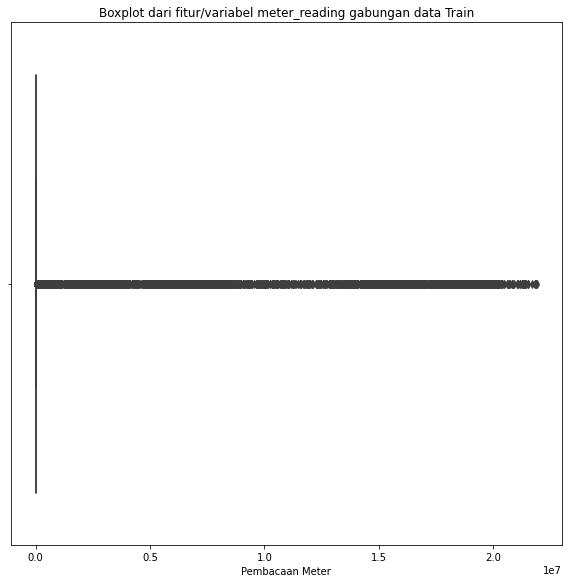

In [39]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df_all_Train['meter_reading'])
plt.tight_layout()
plt.xlabel("Pembacaan Meter")
plt.title("Boxplot dari fitur/variabel meter_reading gabungan data Train")
plt.show()

dari deskripsi dan boxplot di atas bisa kita lihat kemungkinan terdapat noise ataupun juga outlier pada fitur/variabel meter_reading

In [40]:
#Fungsi plotting/tampil grafik distribusi dari tiap kolom pada dataframe
sns.set_theme()

def tampil_grafik_distribusi(dataframe, column_name):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.distplot(dataframe[column_name], color='red', ax = ax).set_title("Grafik Distribusi untuk {}".format(column_name), fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.show()

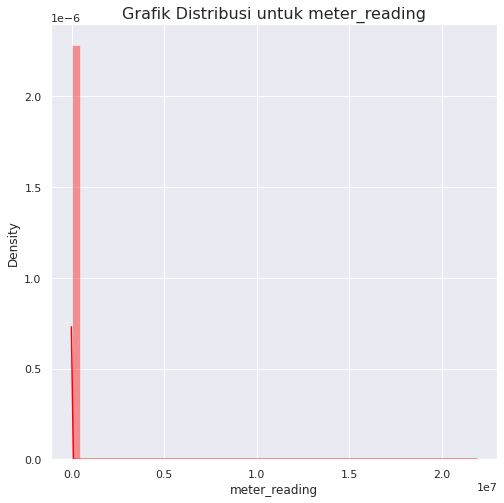

In [41]:
tampil_grafik_distribusi(df_all_Train,'meter_reading')

In [42]:
print('Skewness dari kolom Meter Reading', df_all_Train['meter_reading'].skew())

Skewness dari kolom Meter Reading 104.81131


Pada grafik terlihat data pada kolom meter_reading sangat miring(extreamly skewed) dan tidak banyak wawasan yang dapat dikumpulkan dari plot di atas tersebut. Oleh karena itu, perlu melakukan transformasi log.

In [43]:
#Melakukan transformasi log terhadap data di kolom meter_reading pada data train
df_all_Train['meter_reading']=np.log1p(df_all_Train['meter_reading'])

In [ ]:
#Melihat deskripsi data dan grafik dari data meter_reading setelah transformasi log
df_all_Train['meter_reading'].describe()

count    2.021610e+07
mean     4.208398e+00
std      2.074255e+00
min      0.000000e+00
25%      2.960105e+00
50%      4.379210e+00
75%      5.594652e+00
max      1.690221e+01
Name: meter_reading, dtype: float64

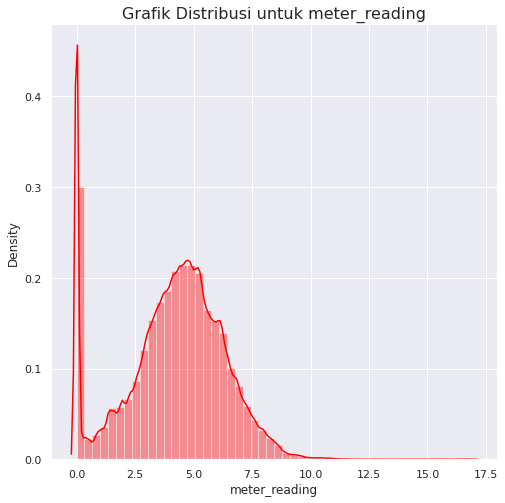

In [44]:
tampil_grafik_distribusi(df_all_Train,'meter_reading')

In [45]:
#Melihat Skewness setelah tranformasi log
print('Skewness dari kolom Meter Reading setelah transformasi log', df_all_Train['meter_reading'].skew())

Skewness dari kolom Meter Reading setelah transformasi log -0.27537704


Setelah melihat distribusi normal dari data, terlihat banyak nilai 0 pada sebelah kiri dan kemungkinan noise atau outlier di sebelah kanan.

untuk preprocessing meter_reading ini, maka akan dibuat suatu data frame baru yang mana hanya berisi data dalam rentang distribusi normal dari meter_reading

In [46]:
#Ingin melihat apakah ada noise ataupun outlier dari data meter_reading yang kita asumsikan berdistribusi normal
#dan menggunakan selang kepercayaan 95% di fitur/variabel meter_reading
df1 = np.abs(df_all_Train.meter_reading - df_all_Train.meter_reading.mean())<=(2*df_all_Train.meter_reading.std())
#mu-2s<x<mu+2s
print(df1.shape)
df1.head()

(20216100,)


0    False
1    False
2    False
3    False
4    False
Name: meter_reading, dtype: bool

terlihat dari data di atas terdapat False di mana ada data yang tidak berada pada distribusi normal.

Dan selanjutnya kita akan buat sebuah data frame gabungan baru di mana data frame tersebut adalah data tanpa outlier

In [47]:
#Membuat data frame baru yang berbeda dimana tanpa outlier 
df_all_Train2 = df_all_Train[df1] #Data tanpa outlier
#Membandingkan dimensi data lama dan data baru
print(df_all_Train2.shape, df_all_Train.shape)

(17995941, 22) (20216100, 22)


In [48]:
df_all_Train2.head().transpose()

,45,72,91,103,104
building_id,46,74,93,105,106
meter,0,0,0,0,0
timestamp,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00
meter_reading,3.993413,3.784219,3.978196,3.190624,0.318163
site_id,0,0,0,1,1
primary_use,Retail,Parking,Office,Education,Education
square_feet,9045,387638,33370,50623,5374
year_built,2016.0,1997.0,1982.0,NaN,NaN
floor_count,NaN,NaN,NaN,5.0,4.0
air_temperature,25.0,25.0,25.0,3.800781,3.800781


In [49]:
#Melihat deskripsi meter_reading baru (df_all_Train2) yang tanpa outlier
df_all_Train2['meter_reading'].describe()

count    1.799594e+07
mean     4.569941e+00
std      1.638743e+00
min      5.996558e-02
25%      3.412796e+00
50%      4.566169e+00
75%      5.674903e+00
max      8.356907e+00
Name: meter_reading, dtype: float64

Pada proses ini kita membuat data frame baru di mana data pada fitur/variabel meter_reading yang dianggap outlier dan juga data bernilai 0 tidak sudah di remove.

ketika melihat dimensi, terlihat data baru jumlah baris lebih sedikit.

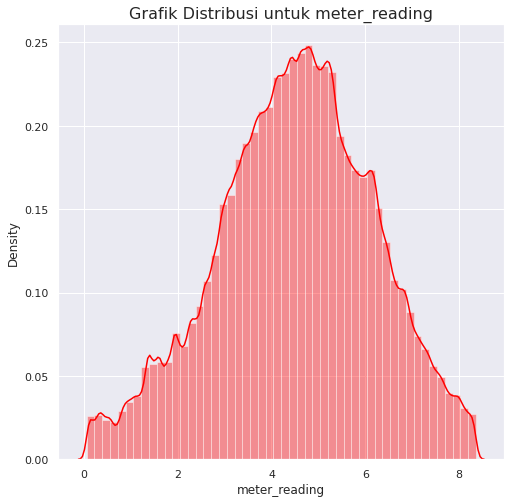

In [50]:
tampil_grafik_distribusi(df_all_Train2,'meter_reading')

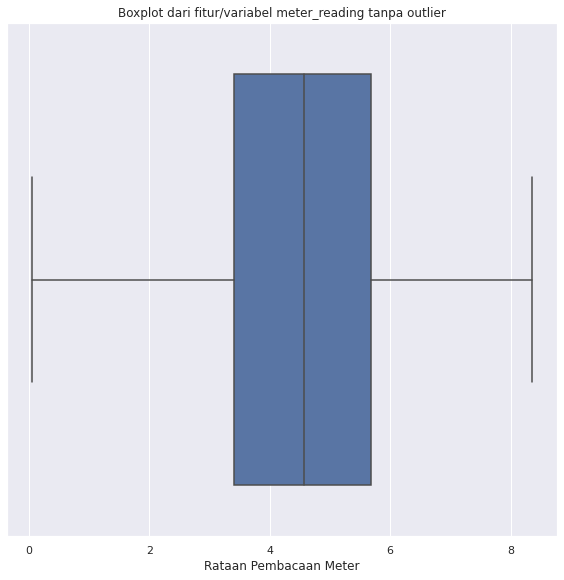

In [51]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df_all_Train2['meter_reading'])
plt.tight_layout()
plt.xlabel("Rataan Pembacaan Meter")
plt.title("Boxplot dari fitur/variabel meter_reading tanpa outlier")
plt.show()

# **7. Melihat Missing Value pada fitur/variabel lain di data frame dan melakukan preprocessing**

Pada langkah sebelumnya kita sudah pernah mengetahui banyaknya Missing Value dari fitur/variabel lain, pada tahapan ini kita akan lihat Missing Value dari persentase dan juga sebarannya.

***Pada kali ini dan selanjutnya untuk gabungan data train akan menggunakan data dari df_all_Train2***

In [52]:
#Missing Value dari tiap fitur/variabel dalam persen pada data Train
mv_train = pd.DataFrame(df_all_Train2.isnull().sum() * 100 / len(df_all_Train2))
mv_train.columns = ["Missing Values"]

mv_train = mv_train[mv_train["Missing Values"] != 0]
mv_train.sort_values(by = "Missing Values", axis = 0, ascending = False, inplace = True)

mv_train

,Missing Values
floor_count,82.269163
year_built,59.888516
cloud_coverage,43.335300
precip_depth_1_hr,19.262499
wind_direction,7.297368
sea_level_pressure,6.489919
wind_speed,0.726053
dew_temperature,0.505331
air_temperature,0.488599


In [53]:
#Missing Value dari tiap fitur/variabel dalam persen
mv_test = pd.DataFrame(df_all_Test.isnull().sum() * 100 / len(df_all_Test))
mv_test.columns = ["Missing Values"]

mv_test = mv_test[mv_test["Missing Values"] != 0]
mv_test.sort_values(by = "Missing Values", axis = 0, ascending = False, inplace = True)

mv_test

,Missing Values
floor_count,82.605042
year_built,58.991597
cloud_coverage,46.866438
precip_depth_1_hr,18.709861
wind_direction,7.143488
sea_level_pressure,6.035901
wind_speed,0.724476
dew_temperature,0.625453
air_temperature,0.532167


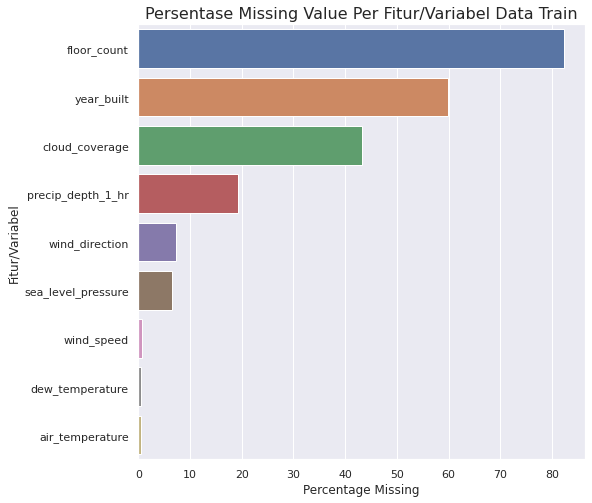

In [54]:
plt.figure(figsize=(8,8))
sns.barplot(x = mv_train['Missing Values'], y = mv_train.index).set_title("Persentase Missing Value Per Fitur/Variabel Data Train", fontsize=16)
plt.xlabel('Percentage Missing', fontsize=12)
plt.ylabel('Fitur/Variabel', fontsize=12)
plt.show()

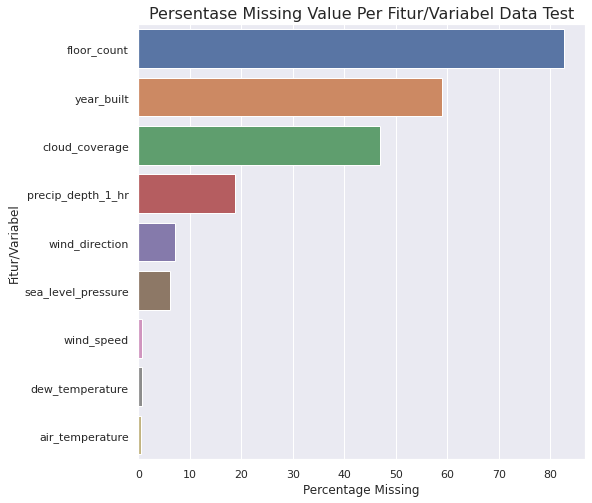

In [55]:
plt.figure(figsize=(8,8))
sns.barplot(x = mv_test['Missing Values'], y = mv_test.index).set_title("Persentase Missing Value Per Fitur/Variabel Data Test", fontsize=16)
plt.xlabel('Percentage Missing', fontsize=12)
plt.ylabel('Fitur/Variabel', fontsize=12)
plt.show()

Terlihat pada gabungan data Train dan Test Fitur/variabel Banyak Lantai(floor_count) dan tahun pembuatan (year_built) memiliki missing value lebih dari 50%, oleh karena itu nantinya dalam proses *preprocessing* kedua fitur/variabel ini kita hapus, sedangkan untuk fitur/variabel dengan missing value 0,5 < MV < 50% lainnya akan dilakukan imputasi dengan mengisi data yang kosong dengan median tiap fitur/variabel

In [56]:
#Mengapus fitur/variabel dengan missing value > 50%
threshold1 = len(df_all_Train2) * 0.5
threshold2 = len(df_all_Test) * 0.5
df_all_Train2.dropna(axis=1, thresh = threshold1, inplace = True)
df_all_Test.dropna(axis=1, thresh = threshold2, inplace = True)

In [57]:
print('Bentuk baru dari Data Train:',df_all_Train2.shape)
print('Bentuk baru dari Data Test:',df_all_Test.shape)

Bentuk baru dari Data Train: (17995941, 20)
Bentuk baru dari Data Test: (41697600, 20)


**Mengisi nilai yang hilang menggunakan median dari kolom/fitur/variabel.**

setelah kita hapus floor_count dan year_built, maka fitur/variabel yang masih memiliki missing value adalah = cloud_coverage,precip_depth_1_hr, wind_direction, sea_level_pressure, wind_speed, dew_temperature, dan air_temperature

untuk ini akan kita lakukan imputasi dengan metode median

In [58]:
#Imputasi Data Train
#Karena Meannya berupa NaN, maka missing value yang akan dilakukan dengan mengimputasinya dengan nilai Median
df_all_Train2['cloud_coverage'].fillna(df_all_Train2['cloud_coverage'].median(), inplace=True)
df_all_Train2['sea_level_pressure'].fillna(df_all_Train2['sea_level_pressure'].median(), inplace=True)
df_all_Train2['precip_depth_1_hr'].fillna(df_all_Train2['precip_depth_1_hr'].median(), inplace=True)
df_all_Train2['wind_direction'].fillna(df_all_Train2['wind_direction'].median(), inplace=True)
df_all_Train2['wind_speed'].fillna(df_all_Train2['wind_speed'].median(), inplace=True)
df_all_Train2['dew_temperature'].fillna(df_all_Train2['dew_temperature'].median(), inplace=True)
df_all_Train2['air_temperature'].fillna(df_all_Train2['air_temperature'].median(), inplace=True)

In [59]:
#Imputasi Data Test
#Karena Meannya berupa NaN, maka missing value yang akan dilakukan dengan mengimputasinya dengan nilai Median
df_all_Test['cloud_coverage'].fillna(df_all_Test['cloud_coverage'].median(), inplace=True)
df_all_Test['sea_level_pressure'].fillna(df_all_Test['sea_level_pressure'].median(), inplace=True)
df_all_Test['precip_depth_1_hr'].fillna(df_all_Test['precip_depth_1_hr'].median(), inplace=True)
df_all_Test['wind_direction'].fillna(df_all_Test['wind_direction'].median(), inplace=True)
df_all_Test['wind_speed'].fillna(df_all_Test['wind_speed'].median(), inplace=True)
df_all_Test['dew_temperature'].fillna(df_all_Test['dew_temperature'].median(), inplace=True)
df_all_Test['air_temperature'].fillna(df_all_Test['air_temperature'].median(), inplace=True)

In [60]:
#Melihat isnul pada data Train
df_all_Train2.isnull().sum() / len(df_all_Train2)

building_id           0.0
meter                 0.0
timestamp             0.0
meter_reading         0.0
site_id               0.0
primary_use           0.0
square_feet           0.0
air_temperature       0.0
cloud_coverage        0.0
dew_temperature       0.0
precip_depth_1_hr     0.0
sea_level_pressure    0.0
wind_direction        0.0
wind_speed            0.0
hour                  0.0
dayofweek             0.0
month                 0.0
dayofyear             0.0
day                   0.0
year                  0.0
dtype: float64

In [61]:
#Melihat isnul pada data Test
df_all_Test.isnull().sum() / len(df_all_Test)

row_id                0.0
building_id           0.0
meter                 0.0
timestamp             0.0
site_id               0.0
primary_use           0.0
square_feet           0.0
air_temperature       0.0
cloud_coverage        0.0
dew_temperature       0.0
precip_depth_1_hr     0.0
sea_level_pressure    0.0
wind_direction        0.0
wind_speed            0.0
hour                  0.0
dayofweek             0.0
month                 0.0
dayofyear             0.0
day                   0.0
year                  0.0
dtype: float64

Sekarang terlihat sudah tidak ada lagi missing value di data gabungan Train dan Test
Selanjutnya kita ingin melihat apakah ada fitur/variabel yang memiliki distribusi normal tapi yang heavily skew. Jika ada maka akan dilakukan transformasi log terhadap fitur/variabel tersebut

**Plot data histrogram setiap fitur/variabel**

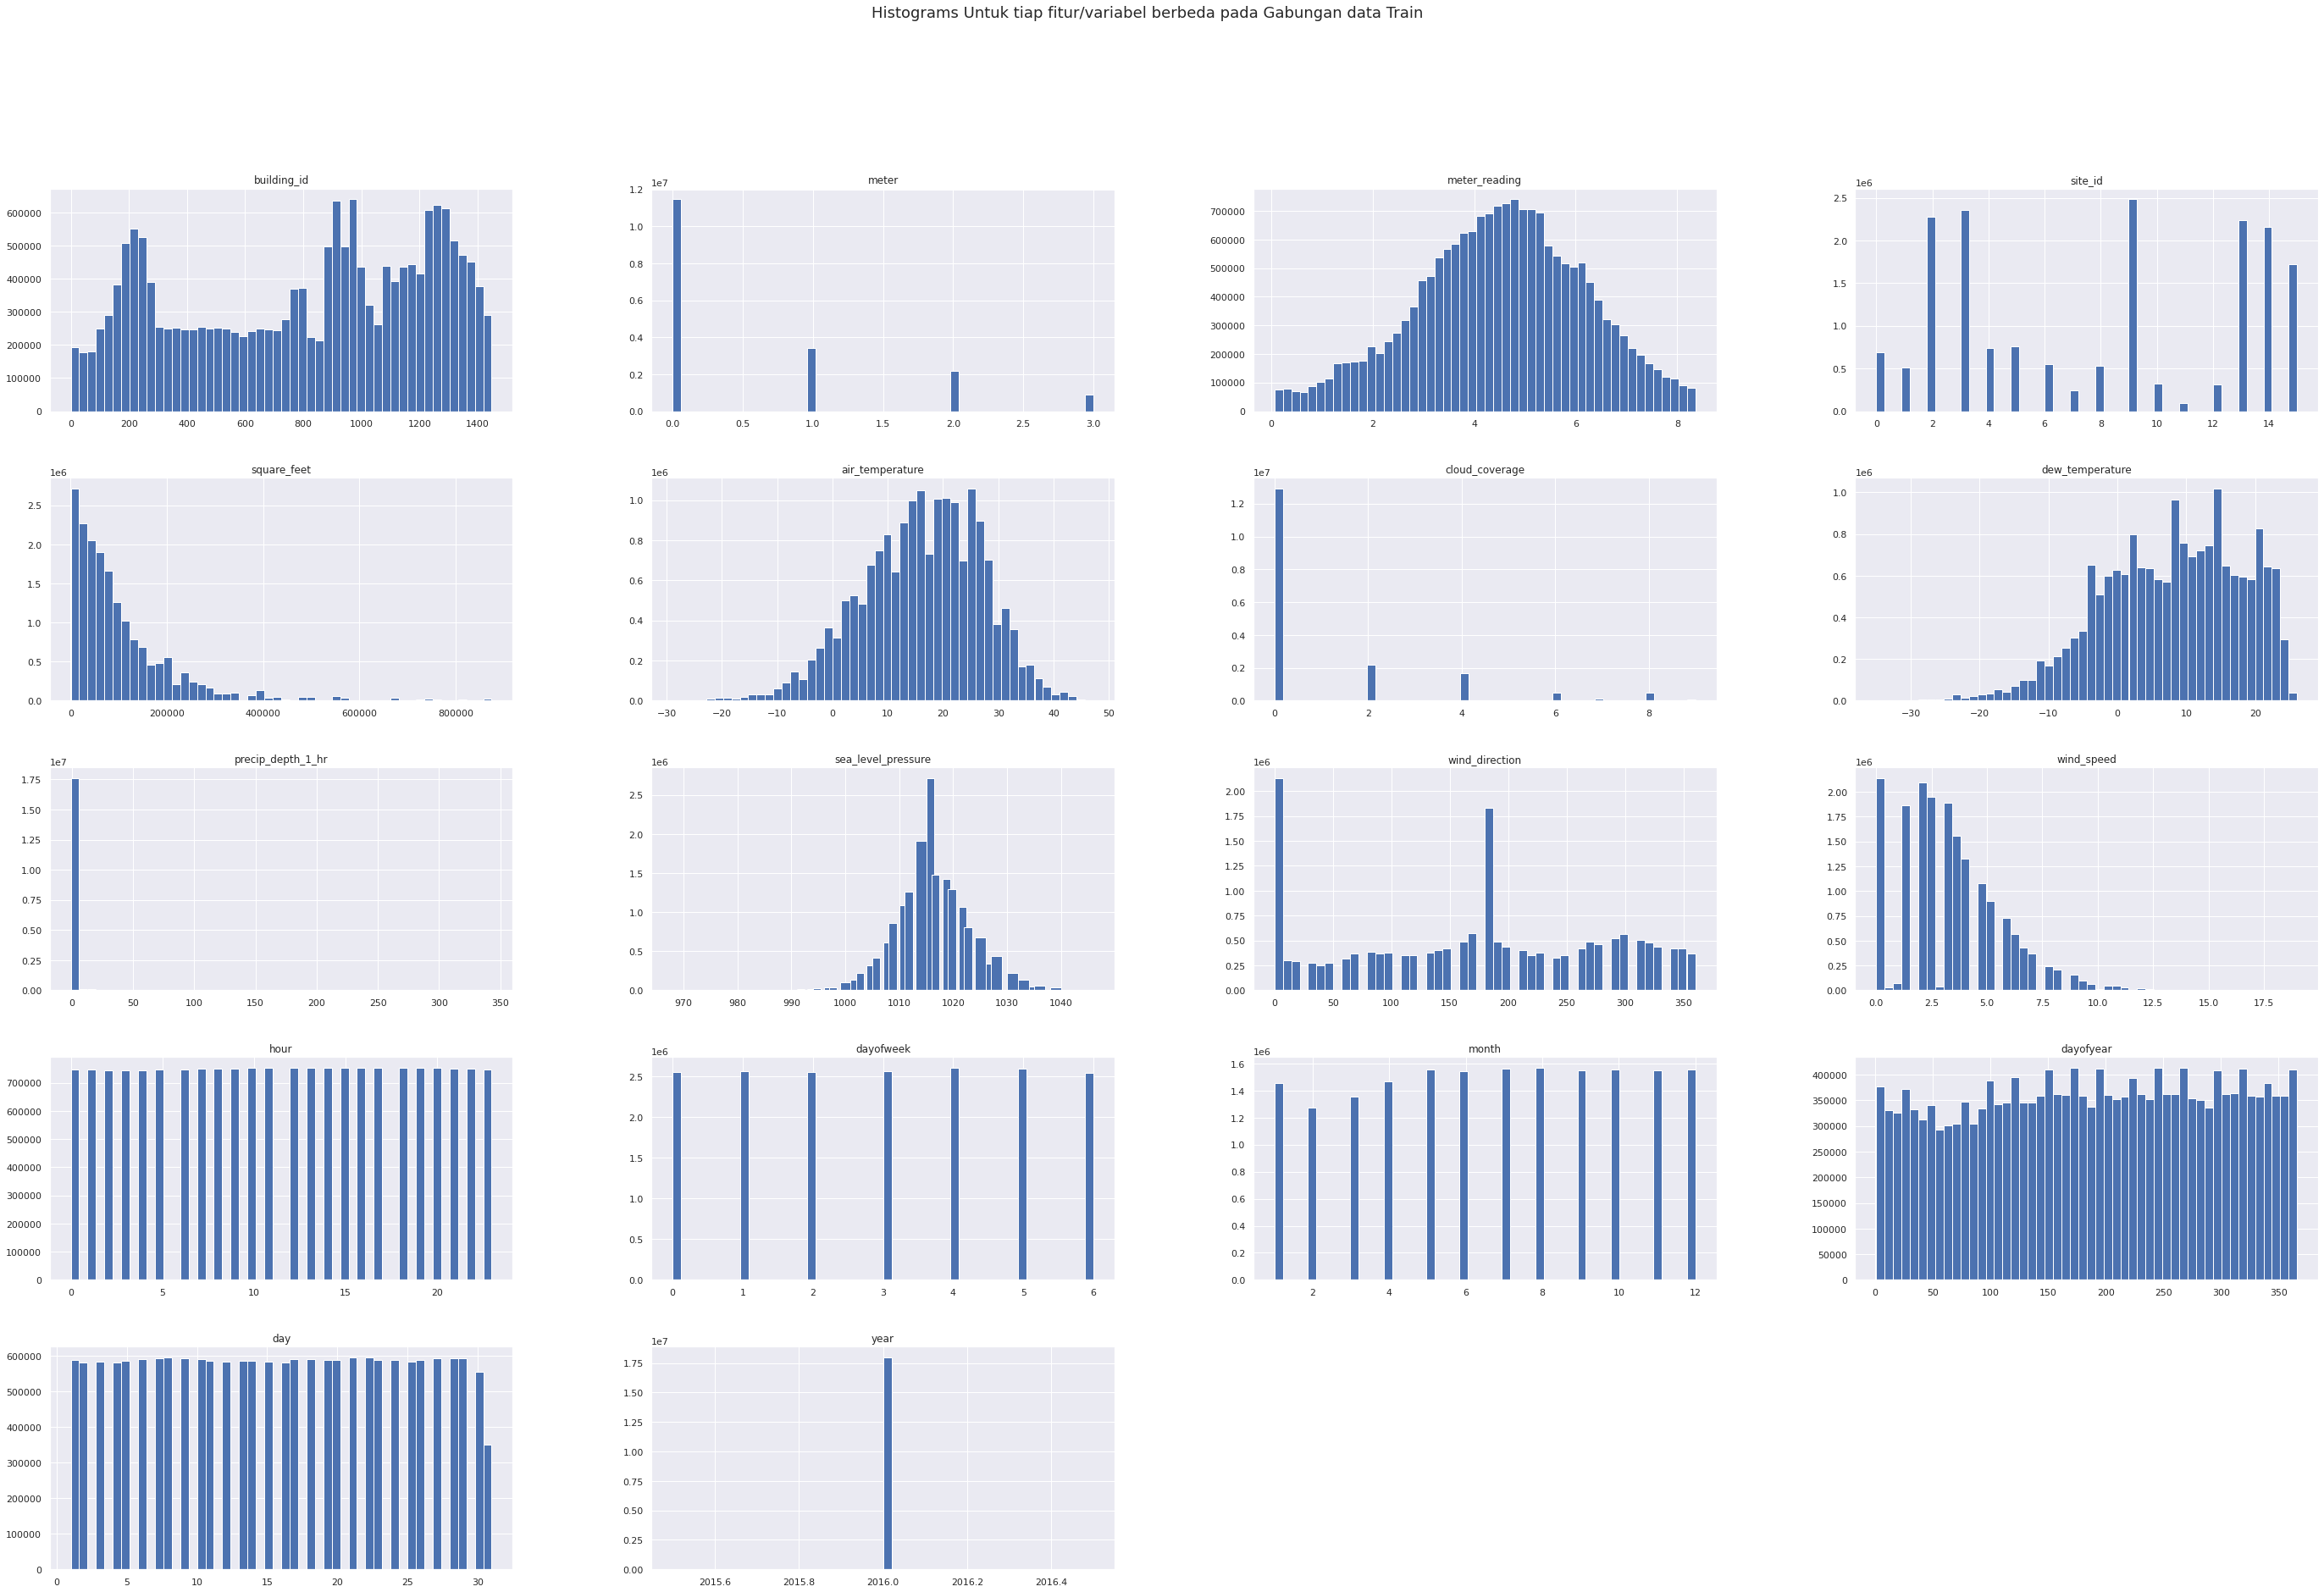

In [62]:
#Melihat boxplot dari semua fitur pada data Train
df_all_Train2.hist(bins=50, figsize=(48,30))
plt.suptitle('Histograms Untuk tiap fitur/variabel berbeda pada Gabungan data Train', fontsize=18)
plt.show()

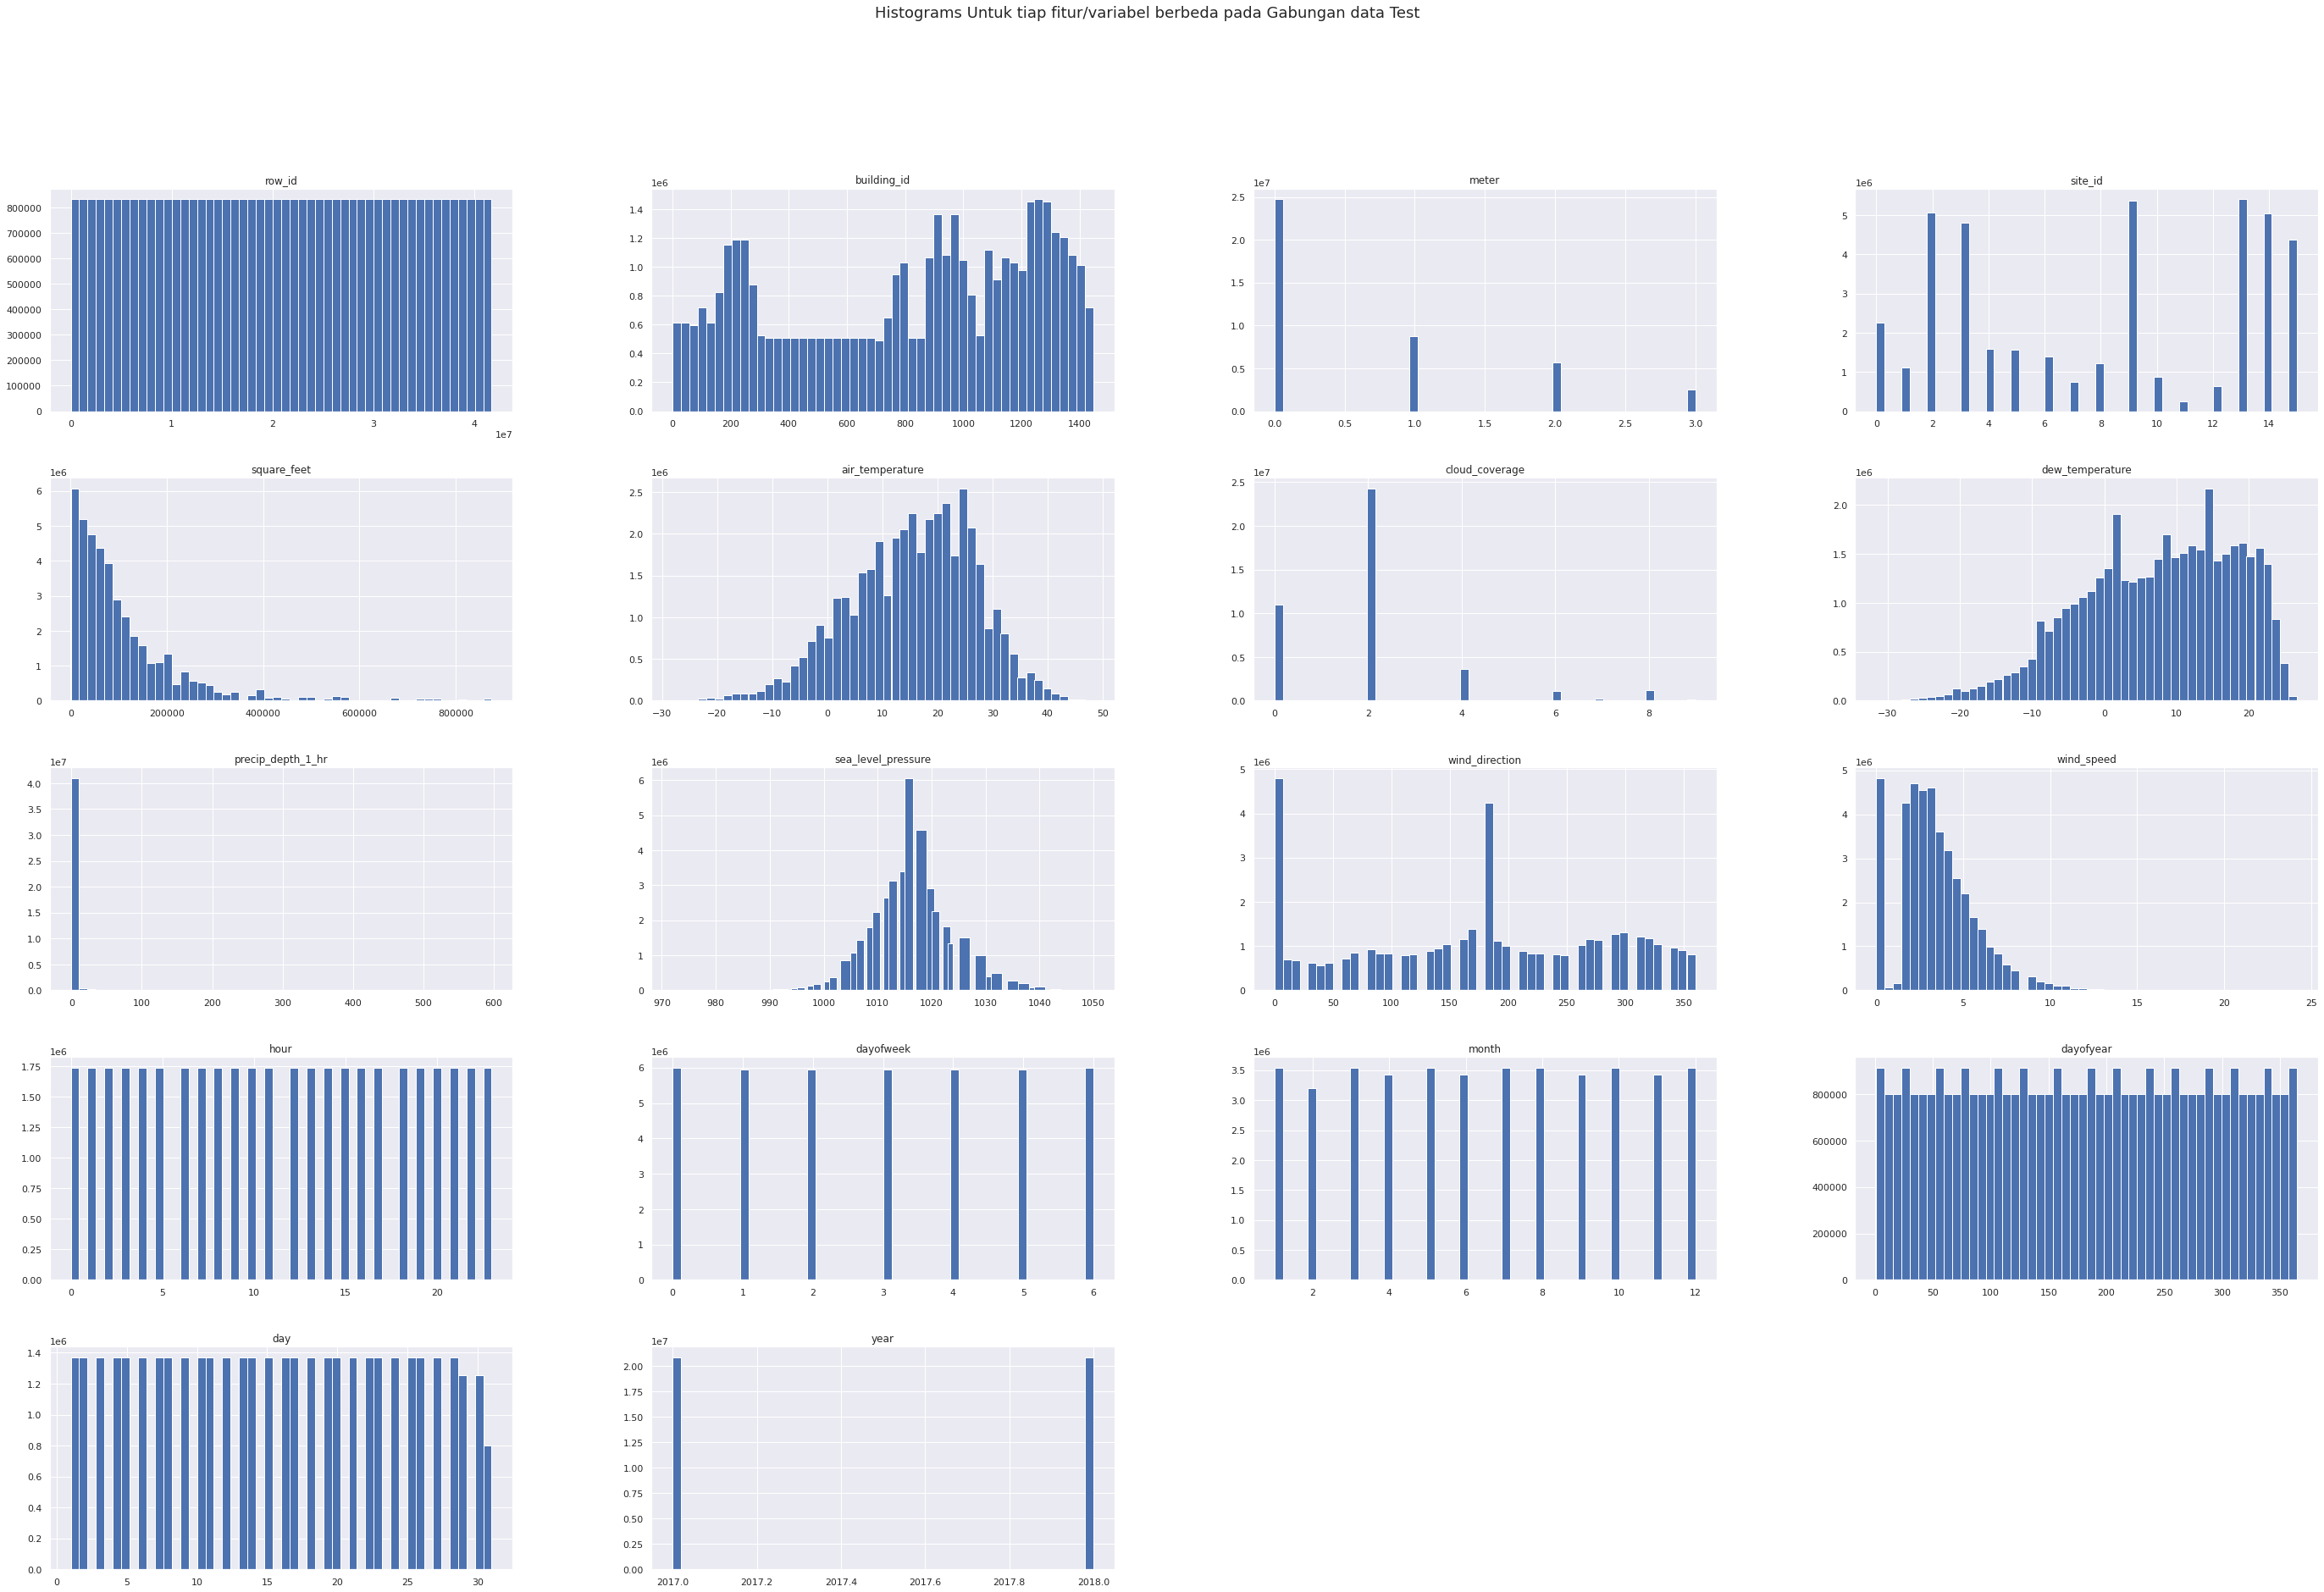

In [63]:
#Melihat boxplot dari semua fitur pada data Test
df_all_Test.hist(bins=50, figsize=(48,30))
plt.suptitle('Histograms Untuk tiap fitur/variabel berbeda pada Gabungan data Test', fontsize=18)
plt.show()

Dari plot di atas sedikit terlihat jika Luas bangunan (square_feet) memiliki skew yang sangat miring baik di tabel gabungan Train maupun Test, oleh karena itu kita akan coba memperhatikannya lebih jelas

In [64]:
print('Skewness dari Luas Bangunan data train', df_all_Train2['square_feet'].skew())
print('Skewness dari Luas Bangunan data test', df_all_Test['square_feet'].skew())

Skewness dari Luas Bangunan data train 2.6819752553631053
Skewness dari Luas Bangunan data test 2.6841443541944368


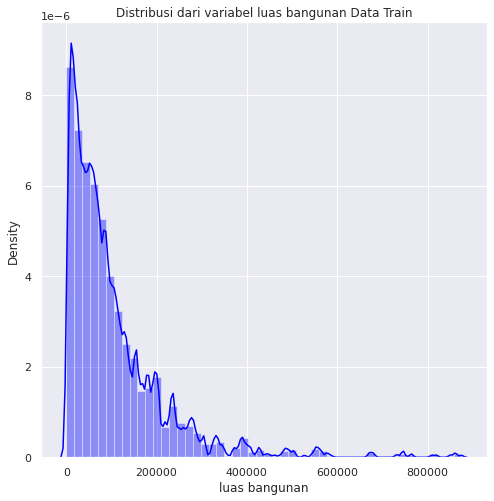

In [65]:
#Melihat distribusi dari luas bangunan (square_feet) data Train
plt.figure(figsize=(8,8))
sns.distplot(df_all_Train2['square_feet'].dropna(), color='blue')
plt.xlabel("luas bangunan")
plt.title("Distribusi dari variabel luas bangunan Data Train")
plt.show()

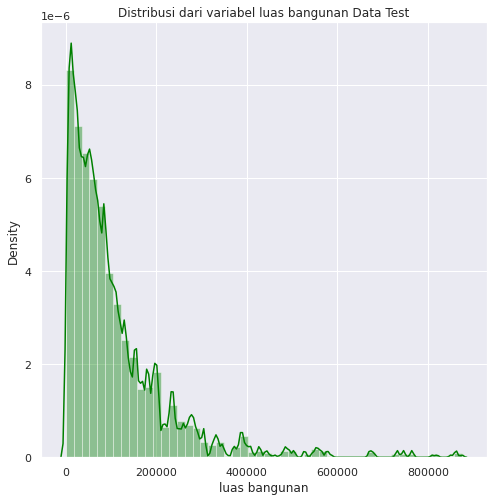

In [66]:
#Melihat distribusi dari luas bangunan (square_feet) data Test
plt.figure(figsize=(8,8))
sns.distplot(df_all_Test['square_feet'].dropna(), color='green')
plt.xlabel("luas bangunan")
plt.title("Distribusi dari variabel luas bangunan Data Test")
plt.show()

sekarang terlihat jelas luas bangunan memiliki skewness sangat miring dan skala nilainya juga sangat besar, maka akan diterapkan transformasi log di sini dan memplot ulang distribusinya.

In [67]:
#transformasi log untuk variabel luas bangunan (square_feet)
df_all_Train2['square_feet']=np.log1p(df_all_Train2['square_feet'])
df_all_Test['square_feet']=np.log1p(df_all_Test['square_feet'])

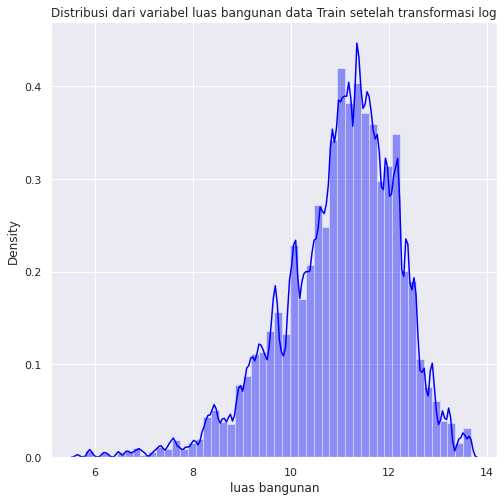

In [68]:
#Melihat distribusi dari luas bangunan (square_feet) setelah transformasi log
plt.figure(figsize=(8,8))
sns.distplot(df_all_Train2['square_feet'].dropna(), color='blue')
plt.xlabel("luas bangunan")
plt.title("Distribusi dari variabel luas bangunan data Train setelah transformasi log")
plt.show()

# **8. Melihat Matriks Korelasi antar Fitur/Variabel**

Text(0.5, 1.0, 'Matriks Korelasi Gabungan Data Train')

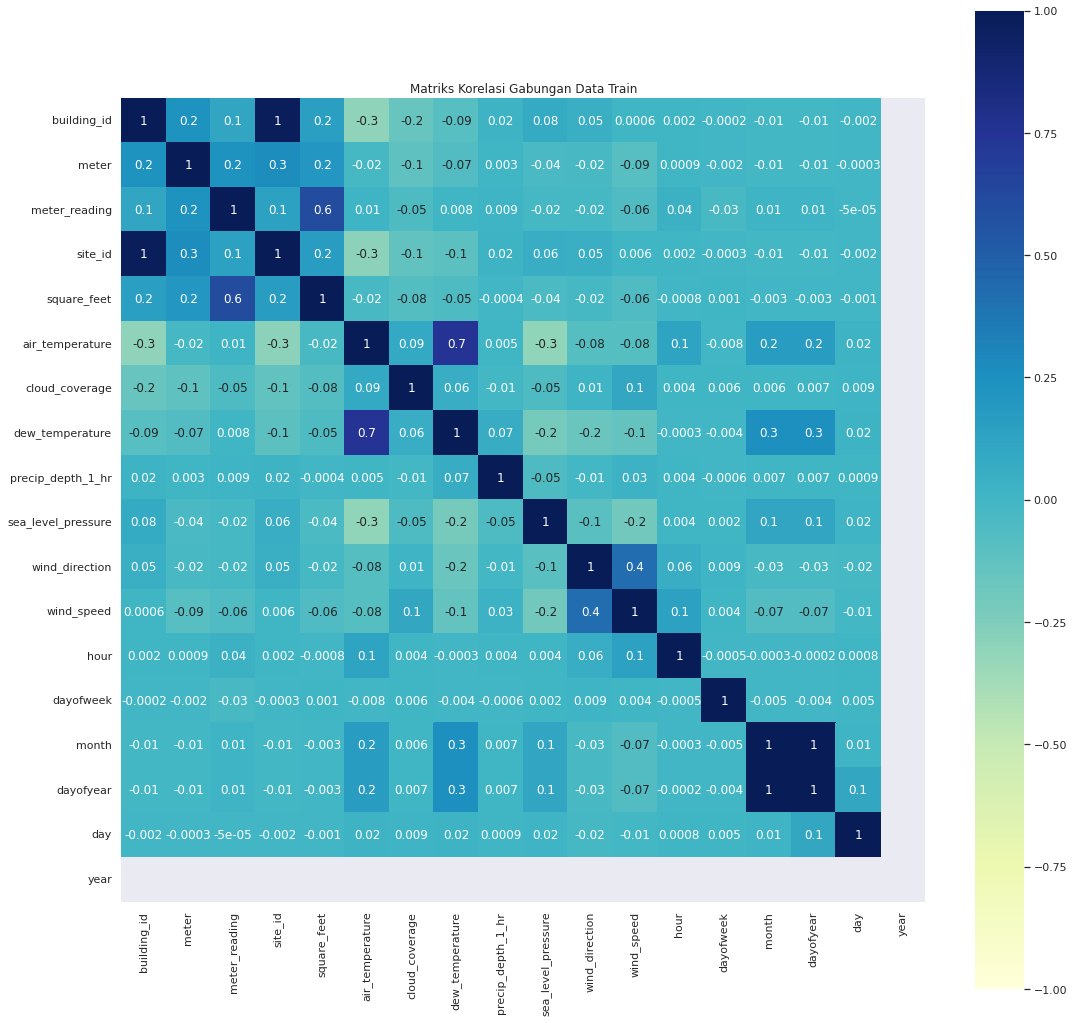

In [69]:
#Matriks Korelasi Gabungan Data Train
plt.figure(figsize=(18,18))
sns.heatmap(df_all_Train2.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, square=True, cmap='YlGnBu')
plt.title('Matriks Korelasi Gabungan Data Train')

In [70]:
target_corr_df = pd.DataFrame(df_all_Train2.corr()["meter_reading"].sort_values(ascending=False))
target_corr_df 

,meter_reading
meter_reading,1.000000
square_feet,0.606197
meter,0.234936
site_id,0.147123
building_id,0.116905
hour,0.038234
month,0.012589
dayofyear,0.012521
air_temperature,0.011972
precip_depth_1_hr,0.009436


Terlihat bahwa tidak ada korelasi selain luas bangunan(square_feet) yang cukup kuat antara pembacaan meter (meter_reading) dengan fitur/variabel lainnya.
Artinya disini terlihat bahwa semakin luas bangunan maka penggunaan daya (meter_reading) semakin besar.

kita akan coba lihat hubungannya pada plot berikutnya.

tapi pada tabel korelasi ada juga fitur/variabel yang satu dengan lain saling berkorelasi postif dan bernilai > 0,7, seperti site_id dengan building_id, air_temperature dengan dew_temperature.
untuk proses pemodelan nanti maka salah satunya akan di remove

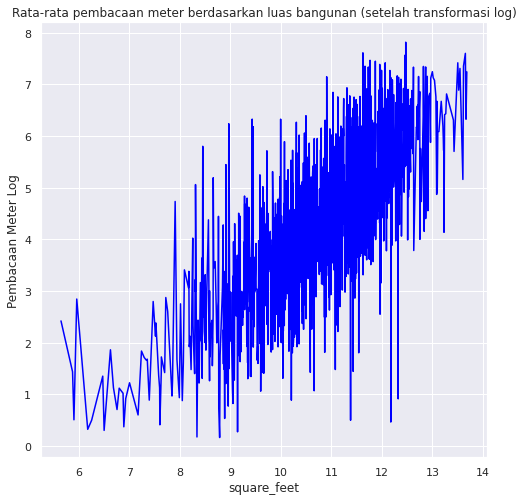

In [71]:
#Sekarang dilihat pengaruh rataan penggunaan daya (pembacaan meter) terhadap luas bangunan (setelah transformasi log)
plt.figure(figsize=(8,8))
temp_df= df_all_Train2.groupby('square_feet').meter_reading.mean().reset_index()
sns.lineplot(x=temp_df['square_feet'], y=temp_df['meter_reading'], color='blue')
plt.ylabel("Pembacaan Meter Log")
plt.title("Rata-rata pembacaan meter berdasarkan luas bangunan (setelah transformasi log)")
plt.show()

Dari plot di atas terlihat ada hubungan positif yang jelas antara keduanya. Dengan bertambahnya ukuran bangunan, penggunaan daya (pembacaan meteran) juga meningkat.
Oleh karena itu fitur/variabel square_feet akan tetap dipakai untuk proses selanjutnya

# **9. Analisa**

Setelah melakukan preprocessing data maka kita akan lakukan analisa statistik dasar yaitu melihat mean (rata-rata) penggunaan daya (pembacaan meter) pada gabungan data Train 

**9.1. Analisis penggunaan daya (pembacaan meter) terhadap Jenis Meter**

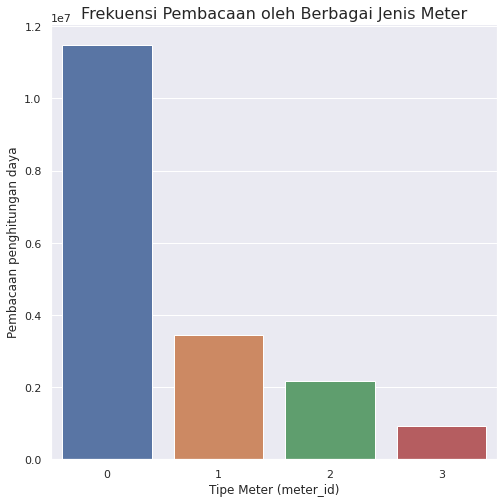

In [72]:
#Melakukan Plot frekuensi penggunaan daya (Pembacaan Meter) dan juga Rataan penggunaan daya (Pembacaan Meter) dengan nama meter_id yang sudah diubah
#1. Plot frekuensi penggunaan daya (Pembacaan Meter)
plt.figure(figsize=(8,8))
sns.countplot(x = 'meter', data = df_all_Train2).set_title("Frekuensi Pembacaan oleh Berbagai Jenis Meter", fontsize=16)
plt.xlabel('Tipe Meter (meter_id)', fontsize=12)
plt.ylabel('Pembacaan penghitungan daya', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Rata-rata Pembacaan oleh Berbagai Jenis Meter')

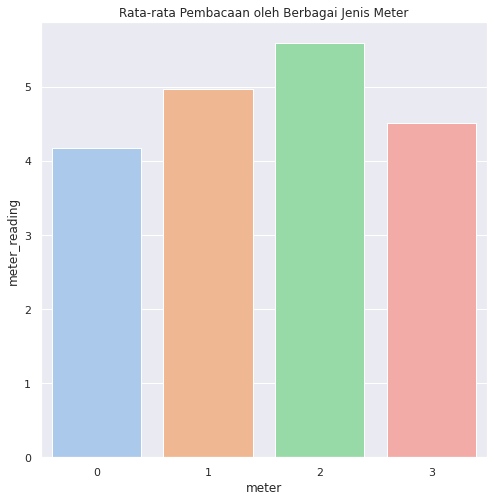

In [73]:
#2. Plot rata-rata penggunaan daya (Pembacaan Meter)
plt.figure(figsize=(8,8))
meter_df= df_all_Train2.groupby('meter').meter_reading.mean().reset_index()
ax= sns.barplot(x='meter', y='meter_reading', data=meter_df, palette='pastel')
plt.title("Rata-rata Pembacaan oleh Berbagai Jenis Meter")

1.   Terlihat dari plot 1 (frekuensi penggunaan daya) berdasarkan meter_id penggunaan listrik memiliki pembacaan meter paling banyak digunakan diikuti oleh air dingin dan uap. Pembacaan terendah adalah untuk untuk air panas 

2.   Terlihat dari plot 2 (Rataan penggunaan daya) Uap adalah yang paling boros daya dan air panas adalah yang paling hemat daya.



**9.2. Analisis penggunaan daya (pembacaan meter) terhadap Waktu**

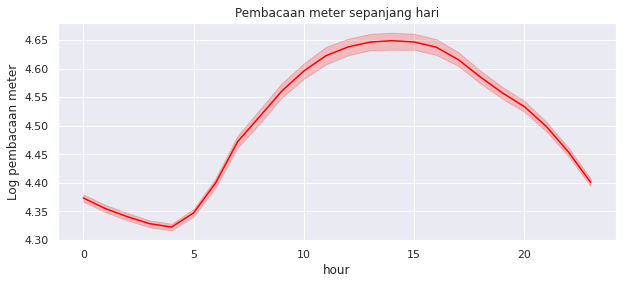

In [74]:
#Melihat rataan penggunaan daya (pembacaan meter_reading) secara harian (pada tiap jamnya)
plt.figure(figsize=(10,4))
hour_df= df_all_Train2.groupby(['timestamp','hour']).meter_reading.mean().reset_index()
sns.lineplot(x=hour_df['hour'], y=hour_df['meter_reading'], color='red')
plt.ylabel("Log pembacaan meter")
plt.title("Pembacaan meter sepanjang hari")
plt.show()

Dapat diamati dari plot di atas bahwa penggunaan daya (pembacaan meter) turun dari waktu tengah malam pada sampai sekitar jam 4 pagi dan naik lagi setelah jam 6 pagi. Penggunaan per jam mencapai puncaknya pada sore hari sekitar jam 2 atau 3 sore. Perilaku ini terlihat jelas karena sebagian besar institut, industri, dan bangunan lainnya beroperasi penuh selama waktu ini.

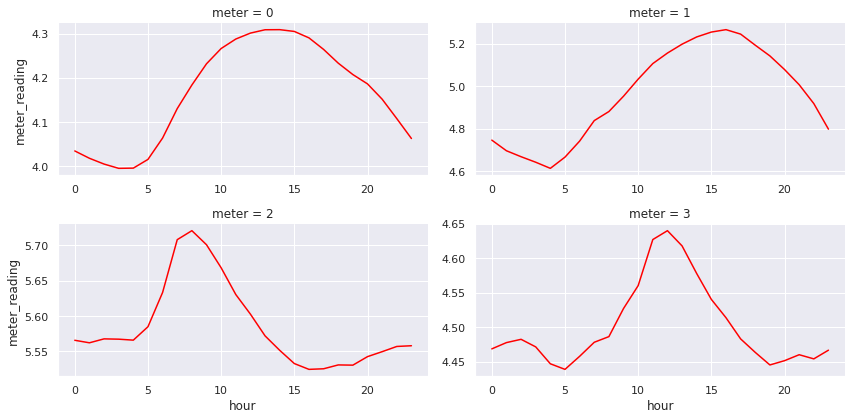

In [75]:
#Pengamatan penggunaan daya harian (dilihat dari rataan penggunaan tiap jamnya berdasarkan tipe meter)
hour_use_df_mr= df_all_Train2.groupby(['hour', 'meter']).meter_reading.mean().reset_index()
p=sns.FacetGrid(hour_use_df_mr, col='meter', col_wrap=2, height=3, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'hour', 'meter_reading', color='red')
plt.show()

Jika kita bandingkan rataan penggunaan daya (pembacaan meter) keseluruhan dengan pembacaan tiap meternya, untuk tipe meter Listrik dan Air Dingin, rataan pembacaannya mmirip dengan rataan pembacaan rataan keseluruhan, tapi berbeda dengan pada tipe Air panas dan Uap

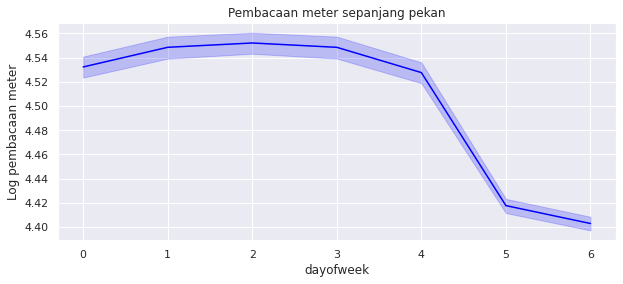

In [76]:
#Melihat rataan penggunaan daya (pembacaan meter_reading) secara pekanan (pada tiap harinya)
plt.figure(figsize=(10,4))
dayofweek_df= df_all_Train2.groupby(['timestamp','dayofweek']).meter_reading.mean().reset_index()
sns.lineplot(x=dayofweek_df['dayofweek'], y=dayofweek_df['meter_reading'], color='blue')
plt.ylabel("Log pembacaan meter")
plt.title("Pembacaan meter sepanjang pekan")
plt.show()

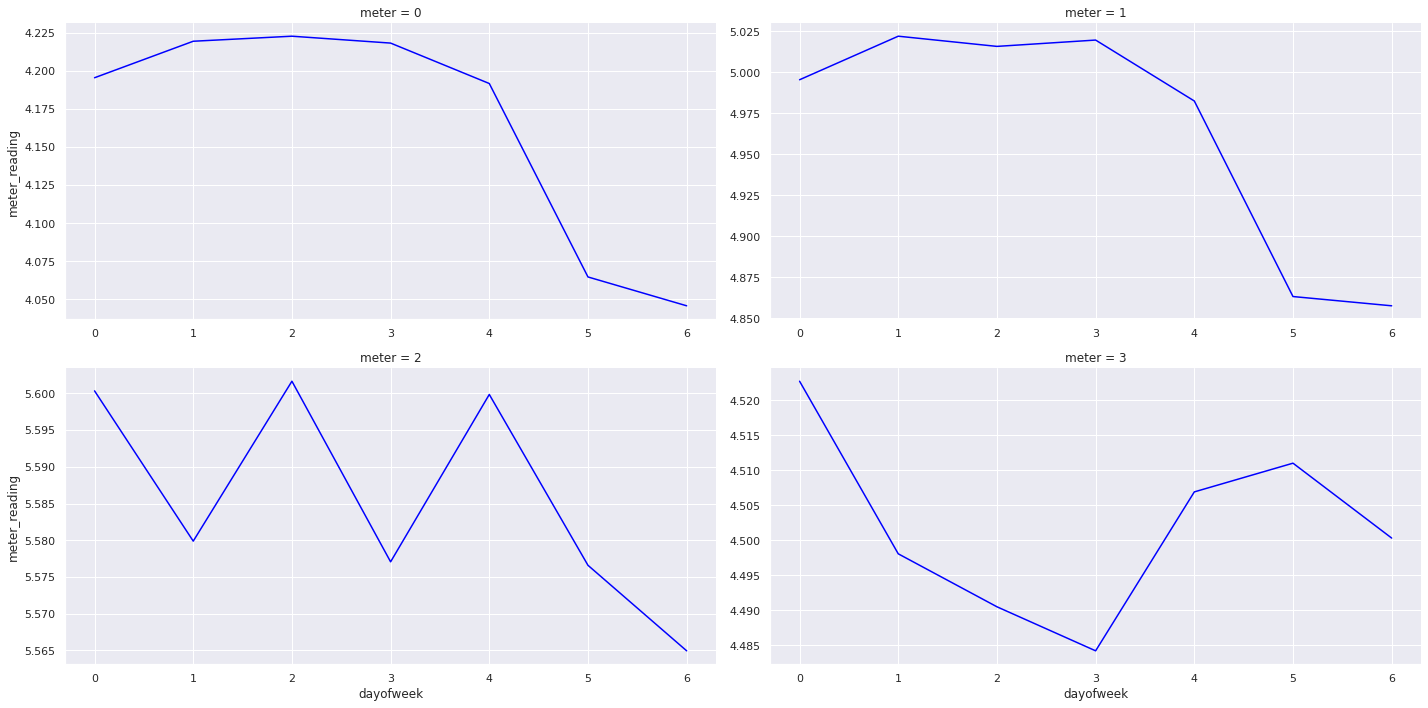

In [77]:
#Pengamatan penggunaan daya pekanan (dilihat dari rataan penggunaan tiap harinya berdasarkan tipe meter)
day_use_df= df_all_Train2.groupby(['dayofweek', 'meter']).meter_reading.mean().reset_index()
p=sns.FacetGrid(day_use_df, col='meter', col_wrap=2, height=5, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'dayofweek', 'meter_reading', color='blue')
plt.show()

Untuk rataan penggunaan daya pekanan hampir secara keseluruhan, penggunaan banyak dilakukan dihari kerja (weekday) dari senin sampai jum'at dan berkurang di hari sabtu dan minggu.

Berdasarkan rataan pada pembacaan meter air dingin dan listrik hampir sama dengan rataan meter keseluruhan

untuk penggunaan upa terlihat di hari selasa, kamis, dan sabtu cenderung sama dimana pemakaian kecil, dan senin, rabu, jum'at juga cenderung sama di mana penggunaan meningkat dan penggunaan hampir tidak ada di hari minggu.

Dan untuk rataan penggunaan air panas berbeda, kebanyakan digunakan pada weekend dan awal weekday

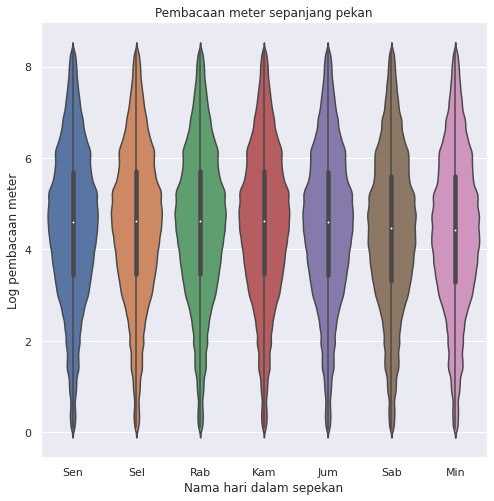

In [78]:
#Melihat rataan penggunaan daya (pembacaan meter_reading) secara pekanan (pada tiap harinya)
plt.figure(figsize=(8,8))
day_labels= ['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min']
p=sns.violinplot(x=df_all_Train2['dayofweek'], y=df_all_Train2['meter_reading'], pallete='muted')
p.set_xticklabels(day_labels)
plt.xlabel("Nama hari dalam sepekan")
plt.ylabel("Log pembacaan meter")
plt.title("Pembacaan meter sepanjang pekan")
plt.show()

Tidak ada banyak perbedaan dalam penggunaan sehari-hari selama sepekan.

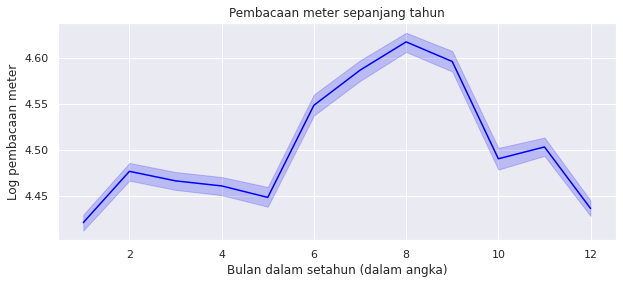

In [79]:
#Melihat rataan penggunaan daya (pembacaan meter_reading) secara tahunan (pada tiap bulannya)
plt.figure(figsize=(10,4))
month_df= df_all_Train2.groupby(['timestamp','month']).meter_reading.mean().reset_index()
sns.lineplot(x=month_df['month'], y=month_df['meter_reading'], color='blue')
plt.xlabel("Bulan dalam setahun (dalam angka)")
plt.ylabel("Log pembacaan meter")
plt.title("Pembacaan meter sepanjang tahun")
plt.show()

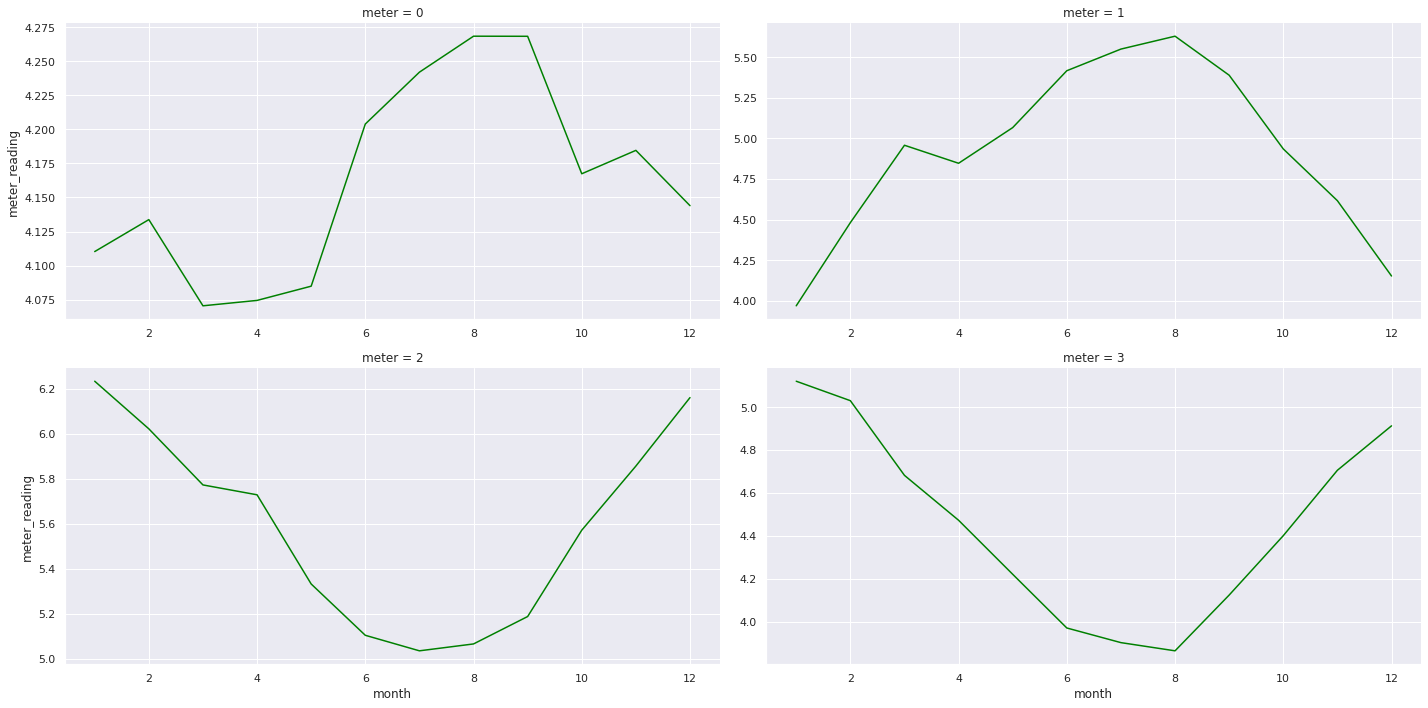

In [80]:
#Pengamatan penggunaan daya tahunan (dilihat dari rataan penggunaan tiap bulannyanya berdasarkan tipe meter)
day_use_df= df_all_Train2.groupby(['month', 'meter']).meter_reading.mean().reset_index()
p=sns.FacetGrid(day_use_df, col='meter', col_wrap=2, height=5, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'month', 'meter_reading', color='green')
plt.show()

dari rataan penggunaan daya (pembacaan) meter perbulan, diketahui bahwa rataan umum mirip dengan rataan penggunaan meter tipe Listrik, sehingg penggunaan meter Listrik banyak mempengarhui pembacaan meter,

terlihat juga penggunaan meter air dingin berbanding terbalik dengan penggunaan meter air panas dan uap, ini dikarenakan musim dan suhu, di musim panas misalnya (Juni - Agustus) penggunaan Air Dingin paling besar sedangkan penggunaan air panas dan uap paling sedikit

In [81]:
#Untuk analisa lebih lanjut, maka kita akan memberikan nama dari tiap kategori dari meter_id, dimana {0: listrik, 1: air dingin, 2: uap, 3: air panas}
df_all_Train2['meter'].replace({0: 'Listrik', 1: 'Air Dingin', 2: 'Uap', 3: 'Air Panas'}, inplace=True)

**9.2. Analisis penggunaan daya (pembacaan meter) terhadap kegunaan gedung**

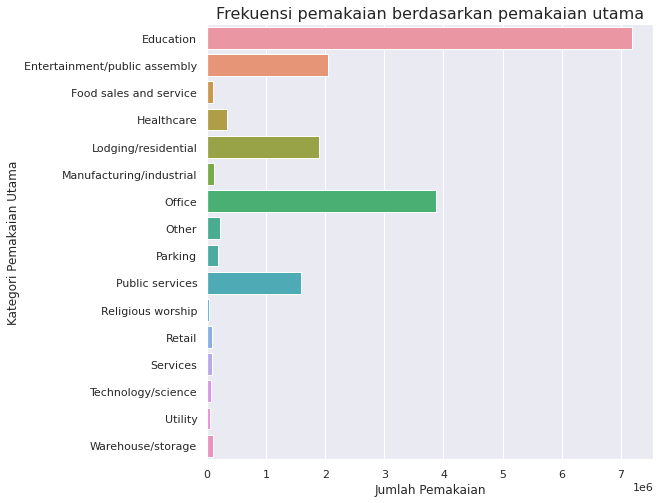

In [82]:
#Sekarang kita akan lakukan pengamatan penggunaan daya berdasarkan pemakaian utama (primary_use)
plt.figure(figsize=(8,8))
sns.countplot(y = 'primary_use', data = df_all_Train2).set_title("Frekuensi pemakaian berdasarkan pemakaian utama", fontsize=16)
plt.ylabel('Kategori Pemakaian Utama', fontsize=12)
plt.xlabel('Jumlah Pemakaian', fontsize=12)
plt.show()

Dari Plot di atas terlihat bahwa penggunaan daya (pembacaan meter) paling besar oleh lembaga pendidikan diikuti oleh kantor, hiburan dan bangunan Penginapan/perumahan.



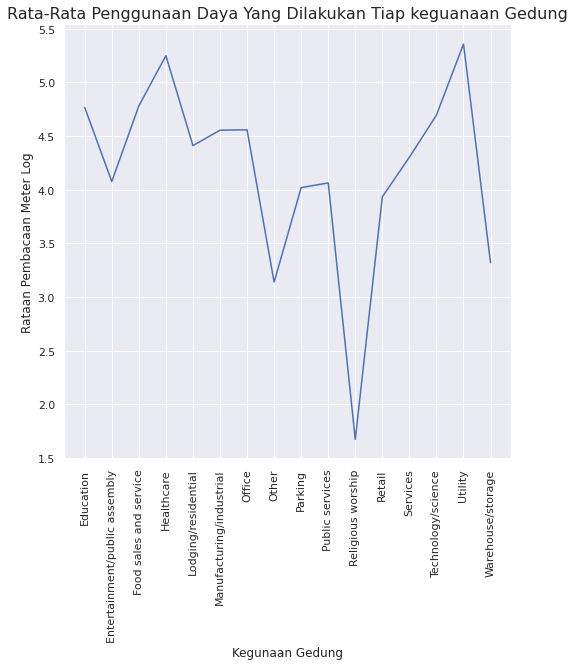

In [83]:
#Rata-rata penggunaan daya (pembacaan meter) tiap kegunaan gedung
building_groups = df_all_Train2.groupby(['primary_use']).meter_reading.mean().reset_index()

plt.figure(figsize=(8,8))
sns.lineplot(x = building_groups['primary_use'], y = building_groups.meter_reading).set_title("Rata-Rata Penggunaan Daya Yang Dilakukan Tiap keguanaan Gedung", fontsize=16)
plt.xlabel('Kegunaan Gedung', fontsize=12)
plt.ylabel('Rataan Pembacaan Meter Log', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Walaupun penggunaan daya (pembacaan meter) di pendidikan banyak tapi rata-rata penggunaan dayanya kecil.
Rata-rata penggunaan daya terbesar oleh gedung utility diikuti oleh healthcare, yang rata-rata penggunaan daya paling rendah oleh religious worship

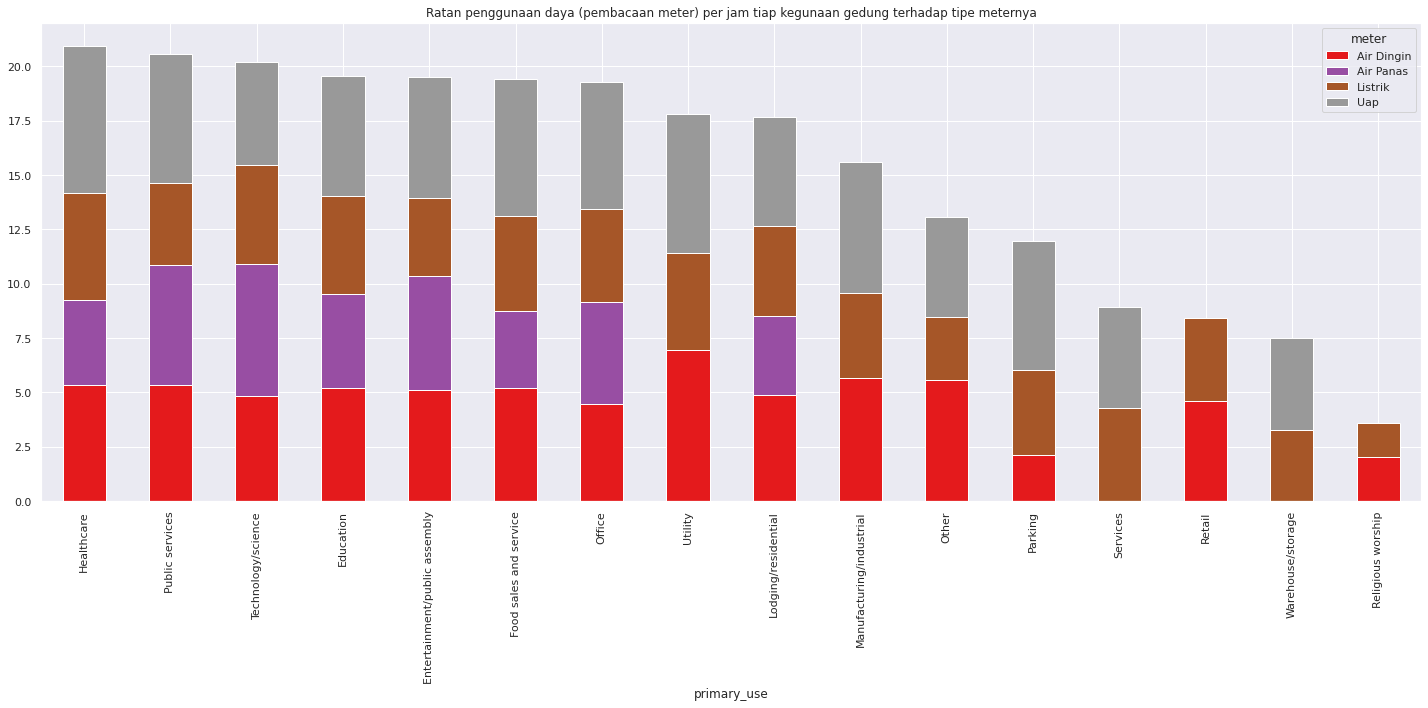

In [84]:
pivot_df = df_all_Train2.groupby(['primary_use','meter'])['meter_reading'].mean().sort_values(ascending = False).reset_index()
pivot_df.head()
pivot_df = pivot_df.pivot(index='primary_use', columns='meter', values='meter_reading')
pivot_df['AllMeters'] = pivot_df.sum(axis = 1)
pivot_df.sort_values('AllMeters', ascending = False).drop('AllMeters',axis = 1).plot(kind = 'bar', figsize = (20,10), colormap = 'Set1', title = 'Ratan penggunaan daya (pembacaan meter) per jam tiap kegunaan gedung terhadap tipe meternya', stacked = True)
plt.tight_layout()

Dari gambar di atas diketahui tidak semua gedung berdasar kegunaannya memakai meter air panas, ada beberapa gedung menggunakan hanya 2 atau 3 tipe meter.

dari Gambar terlihat penggunaan meter paling tinggi untuk Listrik pada gedung healthcare diikuti service, untuk penggunaan uap tertinggi di gedung healthcare diikuti gedung utility dan parking, penggunaan air dingin tertinggi oleh gedung utility, dan penggunaan air panas tertinggi oleh gedung teknologi/sains

**9.3. Analisis penggunaan daya (pembacaan meter) terhadap ID Gedung dan Lokasi gedung**

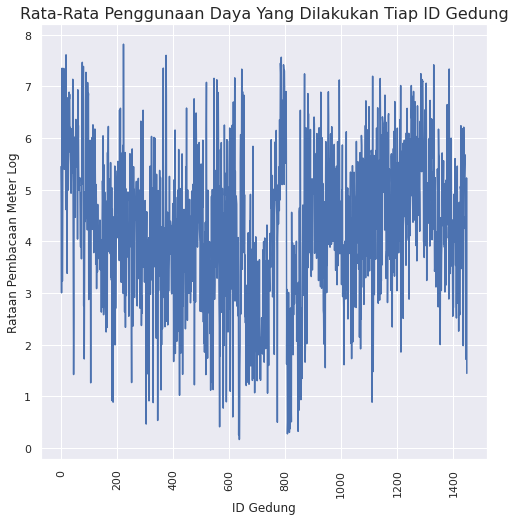

In [85]:
#Pengamatan penggunaan daya berdasarkan ID Gedung (building_id)
building_groups = df_all_Train2.groupby(['building_id']).meter_reading.mean().reset_index()

plt.figure(figsize=(8,8))
sns.lineplot(x = building_groups['building_id'], y = building_groups.meter_reading).set_title("Rata-Rata Penggunaan Daya Yang Dilakukan Tiap ID Gedung", fontsize=16)
plt.xlabel('ID Gedung', fontsize=12)
plt.ylabel('Rataan Pembacaan Meter Log', fontsize=12)
plt.xticks(rotation=90)
plt.show()

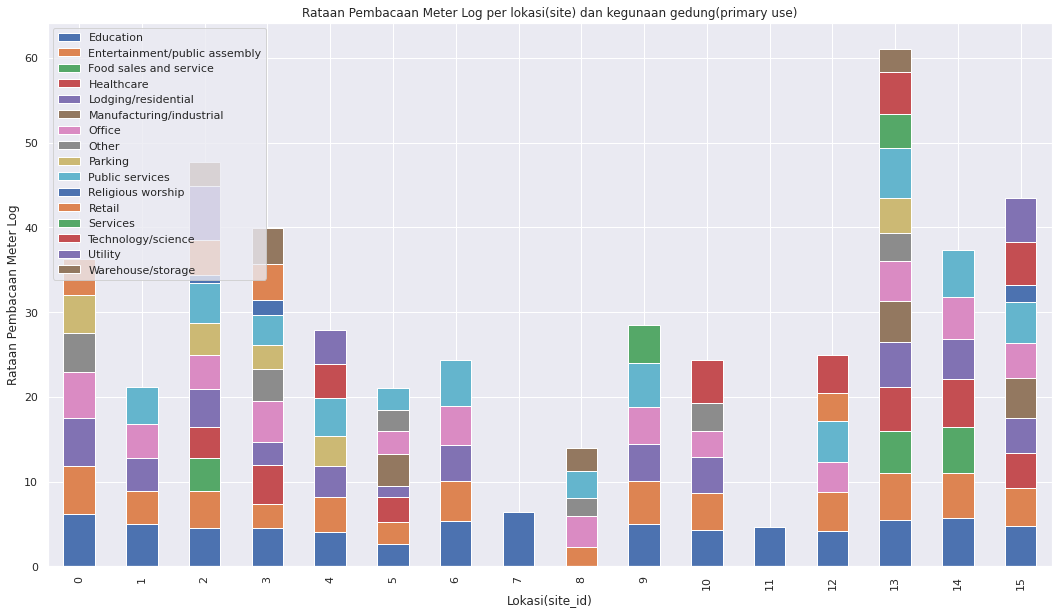

In [86]:
#Pengamatan penggunaan daya tiap gedung (primary_use) berdasarkan lokasi (site_id)
site_use_grouping = df_all_Train2.groupby(['site_id','primary_use'])['meter_reading'].mean().unstack('primary_use')
site_use_grouping.plot(kind = 'bar', stacked = True, figsize=(18,10)).set_title("Rataan Pembacaan Meter Log per lokasi(site) dan kegunaan gedung(primary use)")
plt.xlabel('Lokasi(site_id)')
plt.ylabel('Rataan Pembacaan Meter Log')
plt.legend(loc = "upper left")
plt.show()

*   Lokasi ke-13 memiliki pembacaan meter rata-rata tertinggi.
*   Lokasi ke-11 memiliki pembacaan meter rata-rata paling rendah dan bangunan di lokasi ini hanya lembaga pendidikan


Selanjutnya kita akan melihat tiap distribusi dari data pada fitur-fitur lainnya dan juga melihat rataan penggunaan daya (pembacaan meter) terhadap fitur-fitur lain tersebut

**9.4. Analisis penggunaan daya (pembacaan meter) terhadap Waktu pada setiap kegunaan gedung**


Untuk exploratory berikutnya kita akan lihat rataan penggunaan daya harian, pekanan, dan tahunan dari masing-masing pemakaian utama

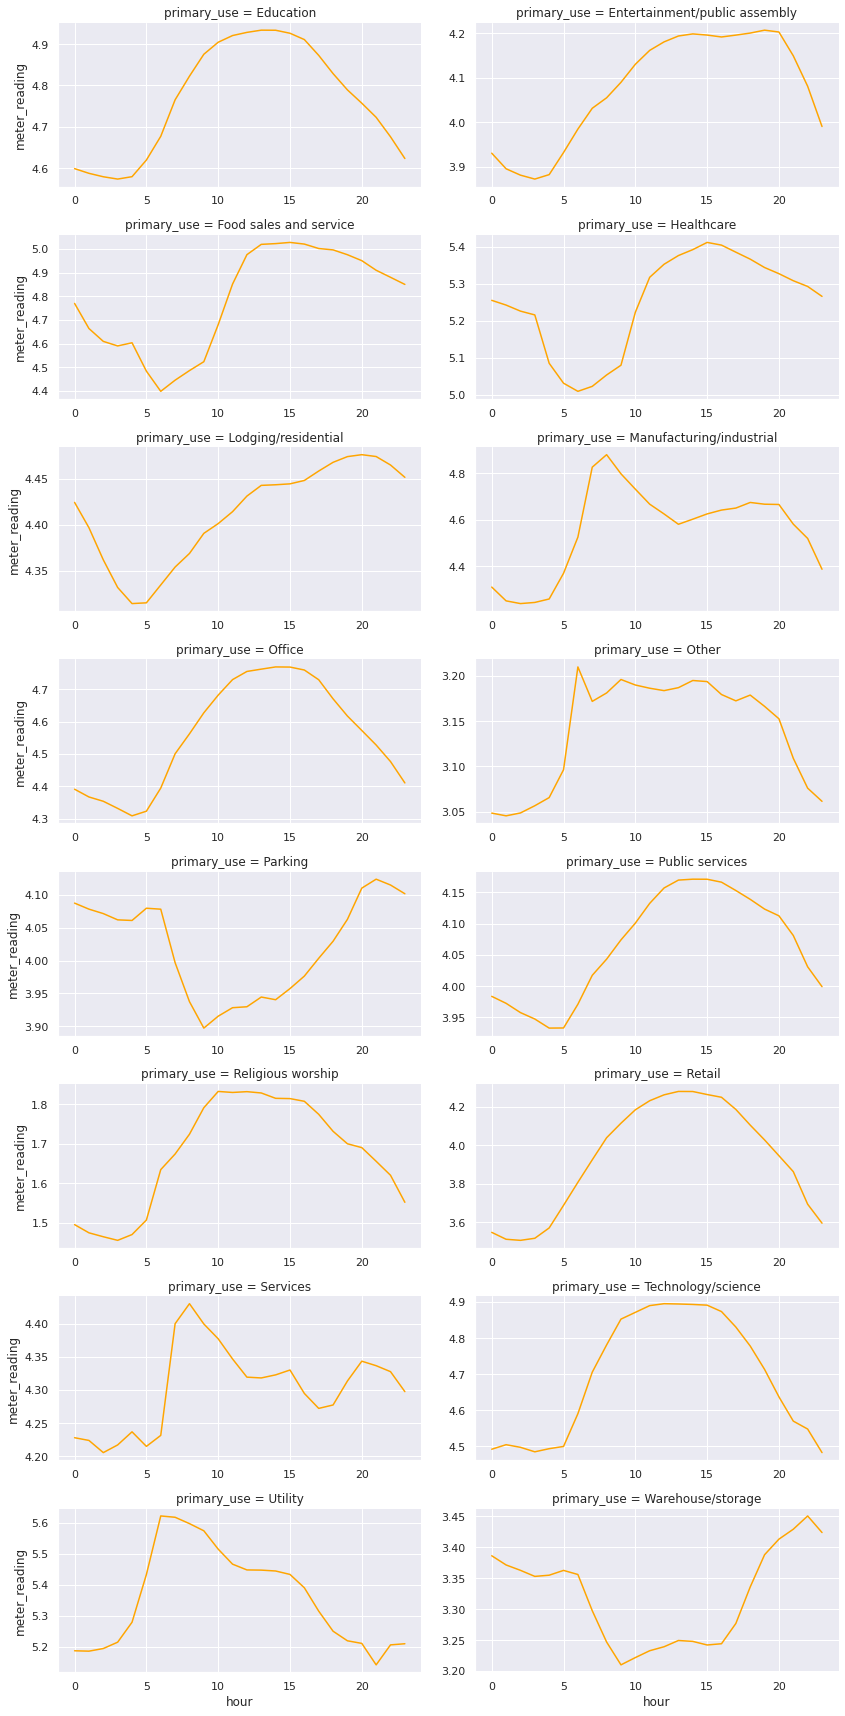

In [87]:
#Pengamatan penggunaan daya harian (dilihat dari rataan penggunaan tiap jamnya berdasarkan tipe bangunan/pemakaian utama)
hour_use_df= df_all_Train2.groupby(['hour', 'primary_use']).meter_reading.mean().reset_index()
p=sns.FacetGrid(hour_use_df, col='primary_use', col_wrap=2, height=3, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'hour', 'meter_reading', color='orange')
plt.show()

Jika dibandingkan rataan penggunaan daya (pembacaan meter) keseluruhan, hanya pembacaan meter pada parking area dan warehouse saja yang berbeda dima kebalikan dari yang lainnya.

untuk tempat parkir misalnya low saat di tempat lain high di karenakan saat itu tempat parkir kosong, sehingga tidak banyak atau hampir tidak ada penggunaan daya saat itu

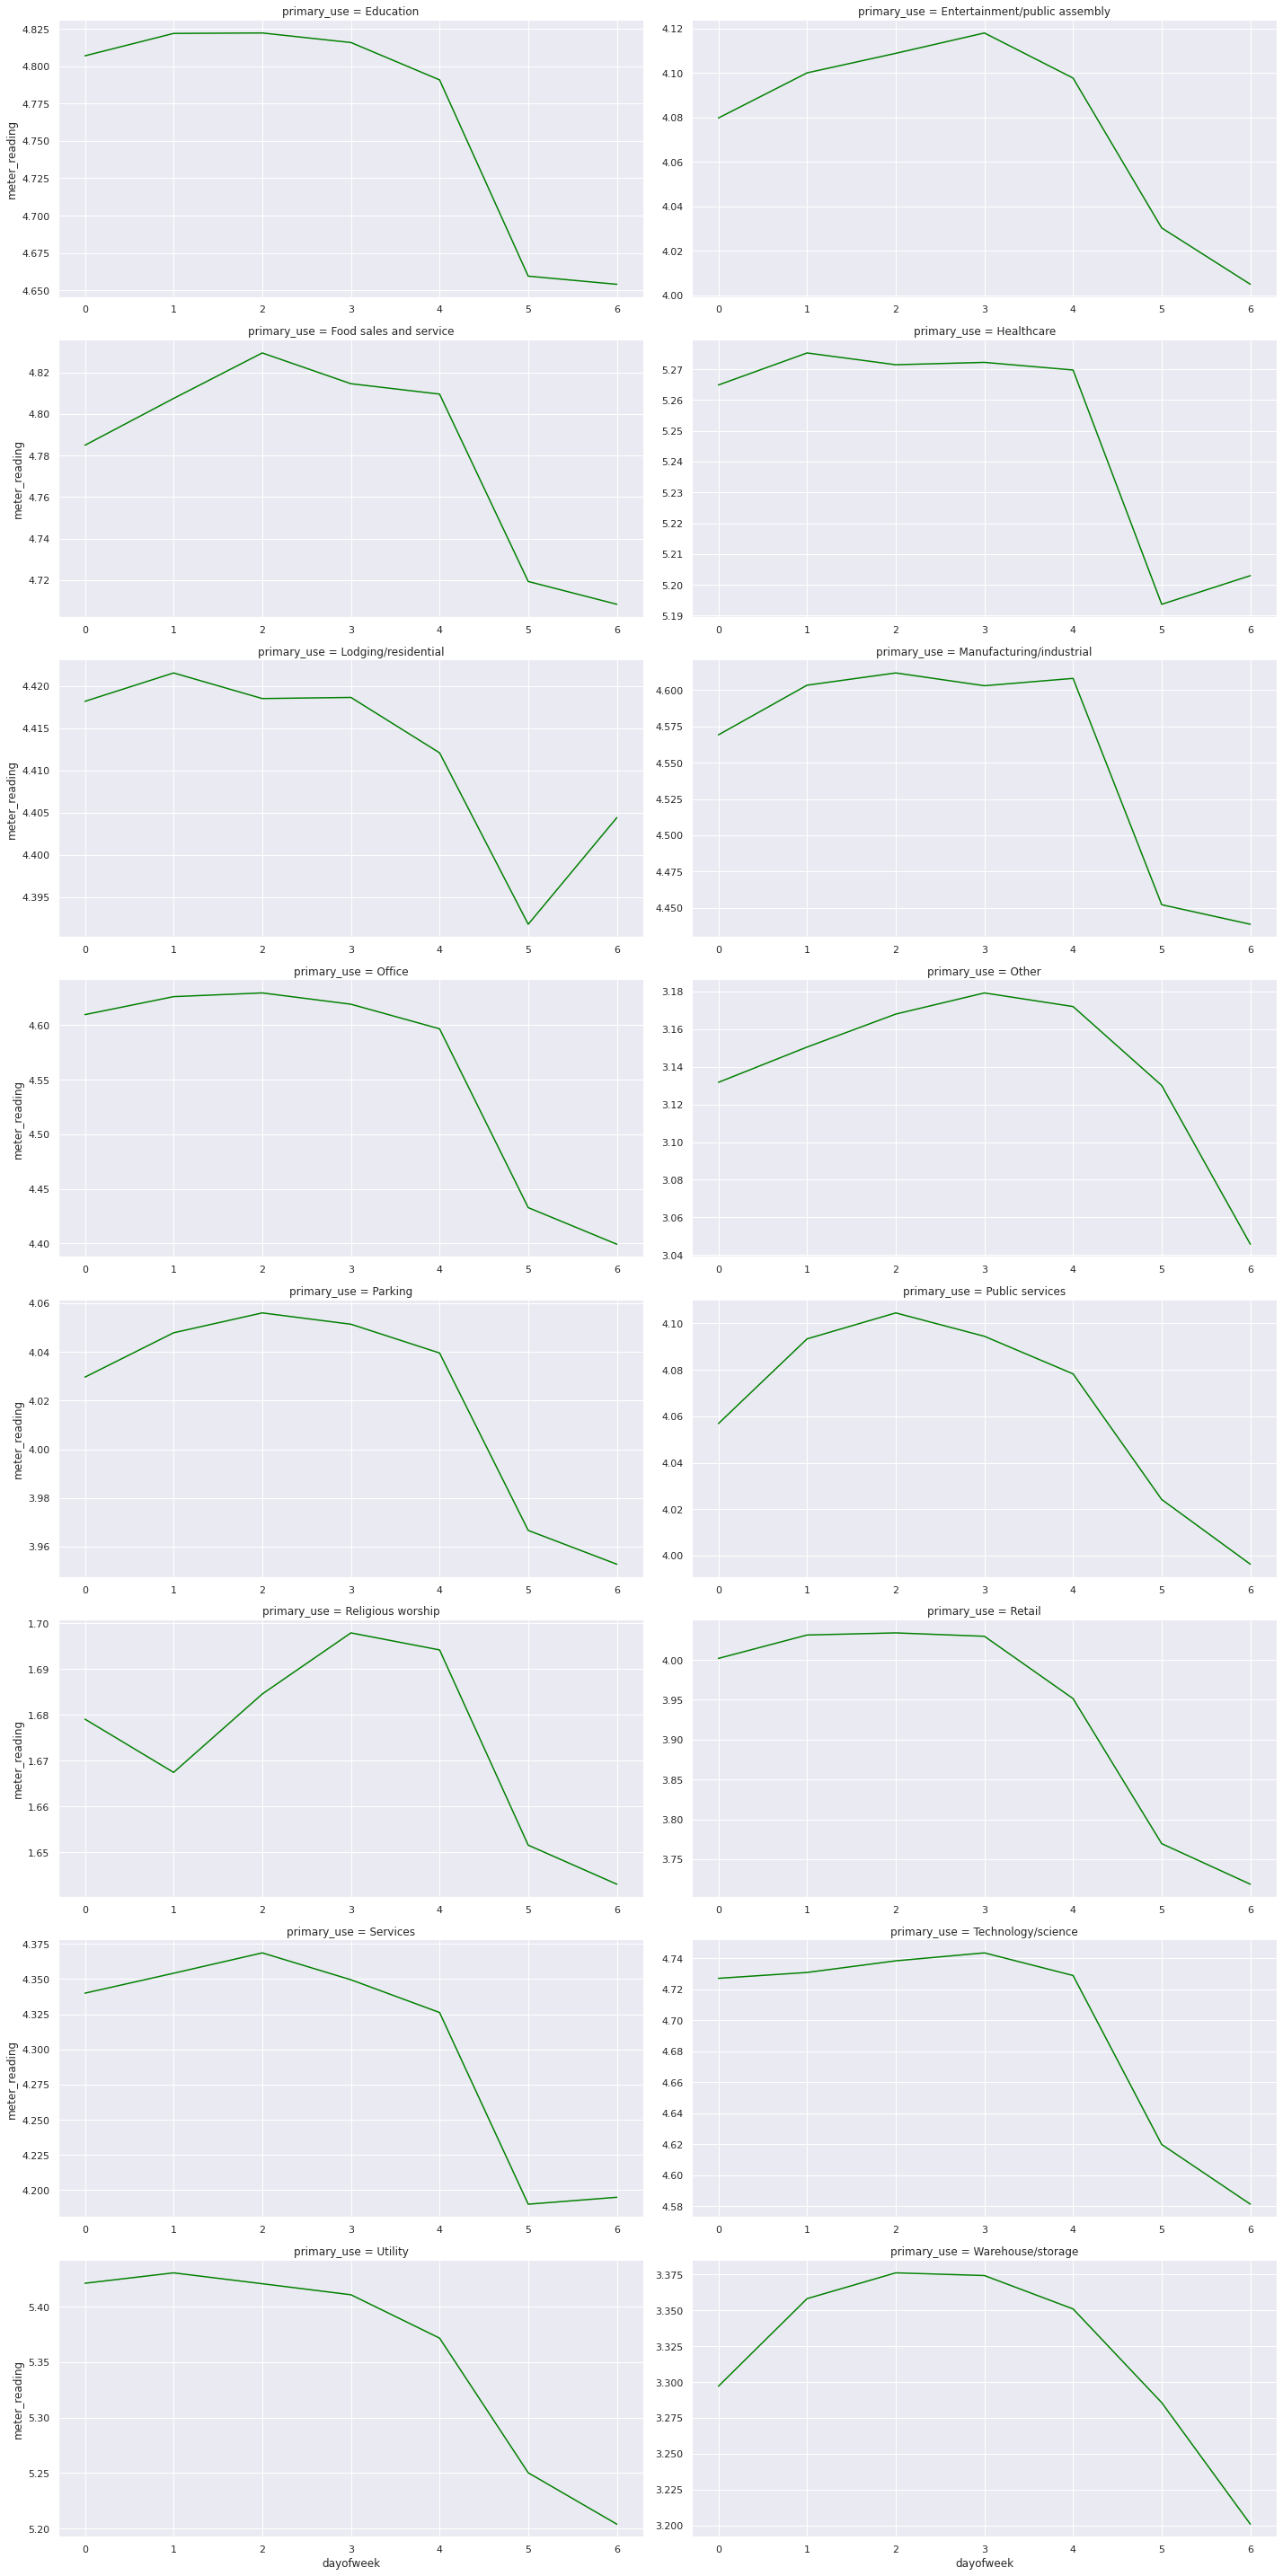

In [88]:
#Pengamatan penggunaan daya pekanan (dilihat dari rataan penggunaan tiap harinya berdasarkan tipe bangunan/pemakaian utama)
day_use_df= df_all_Train2.groupby(['dayofweek', 'primary_use']).meter_reading.mean().reset_index()
p=sns.FacetGrid(day_use_df, col='primary_use', col_wrap=2, height=5, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'dayofweek', 'meter_reading', color='green')
plt.show()

Untuk penggunaan daya pekanan hampir sama, di mana penggunaan daya (pembacaan meter) sangat kecil di hari sabtu dan minggu, kecuali perumahan dan rumah sakit pembacaan lebih besar di hari minggu dibandingkan sabtu karena banyak orang di rumah atau ke rumah sakit untuk cek 

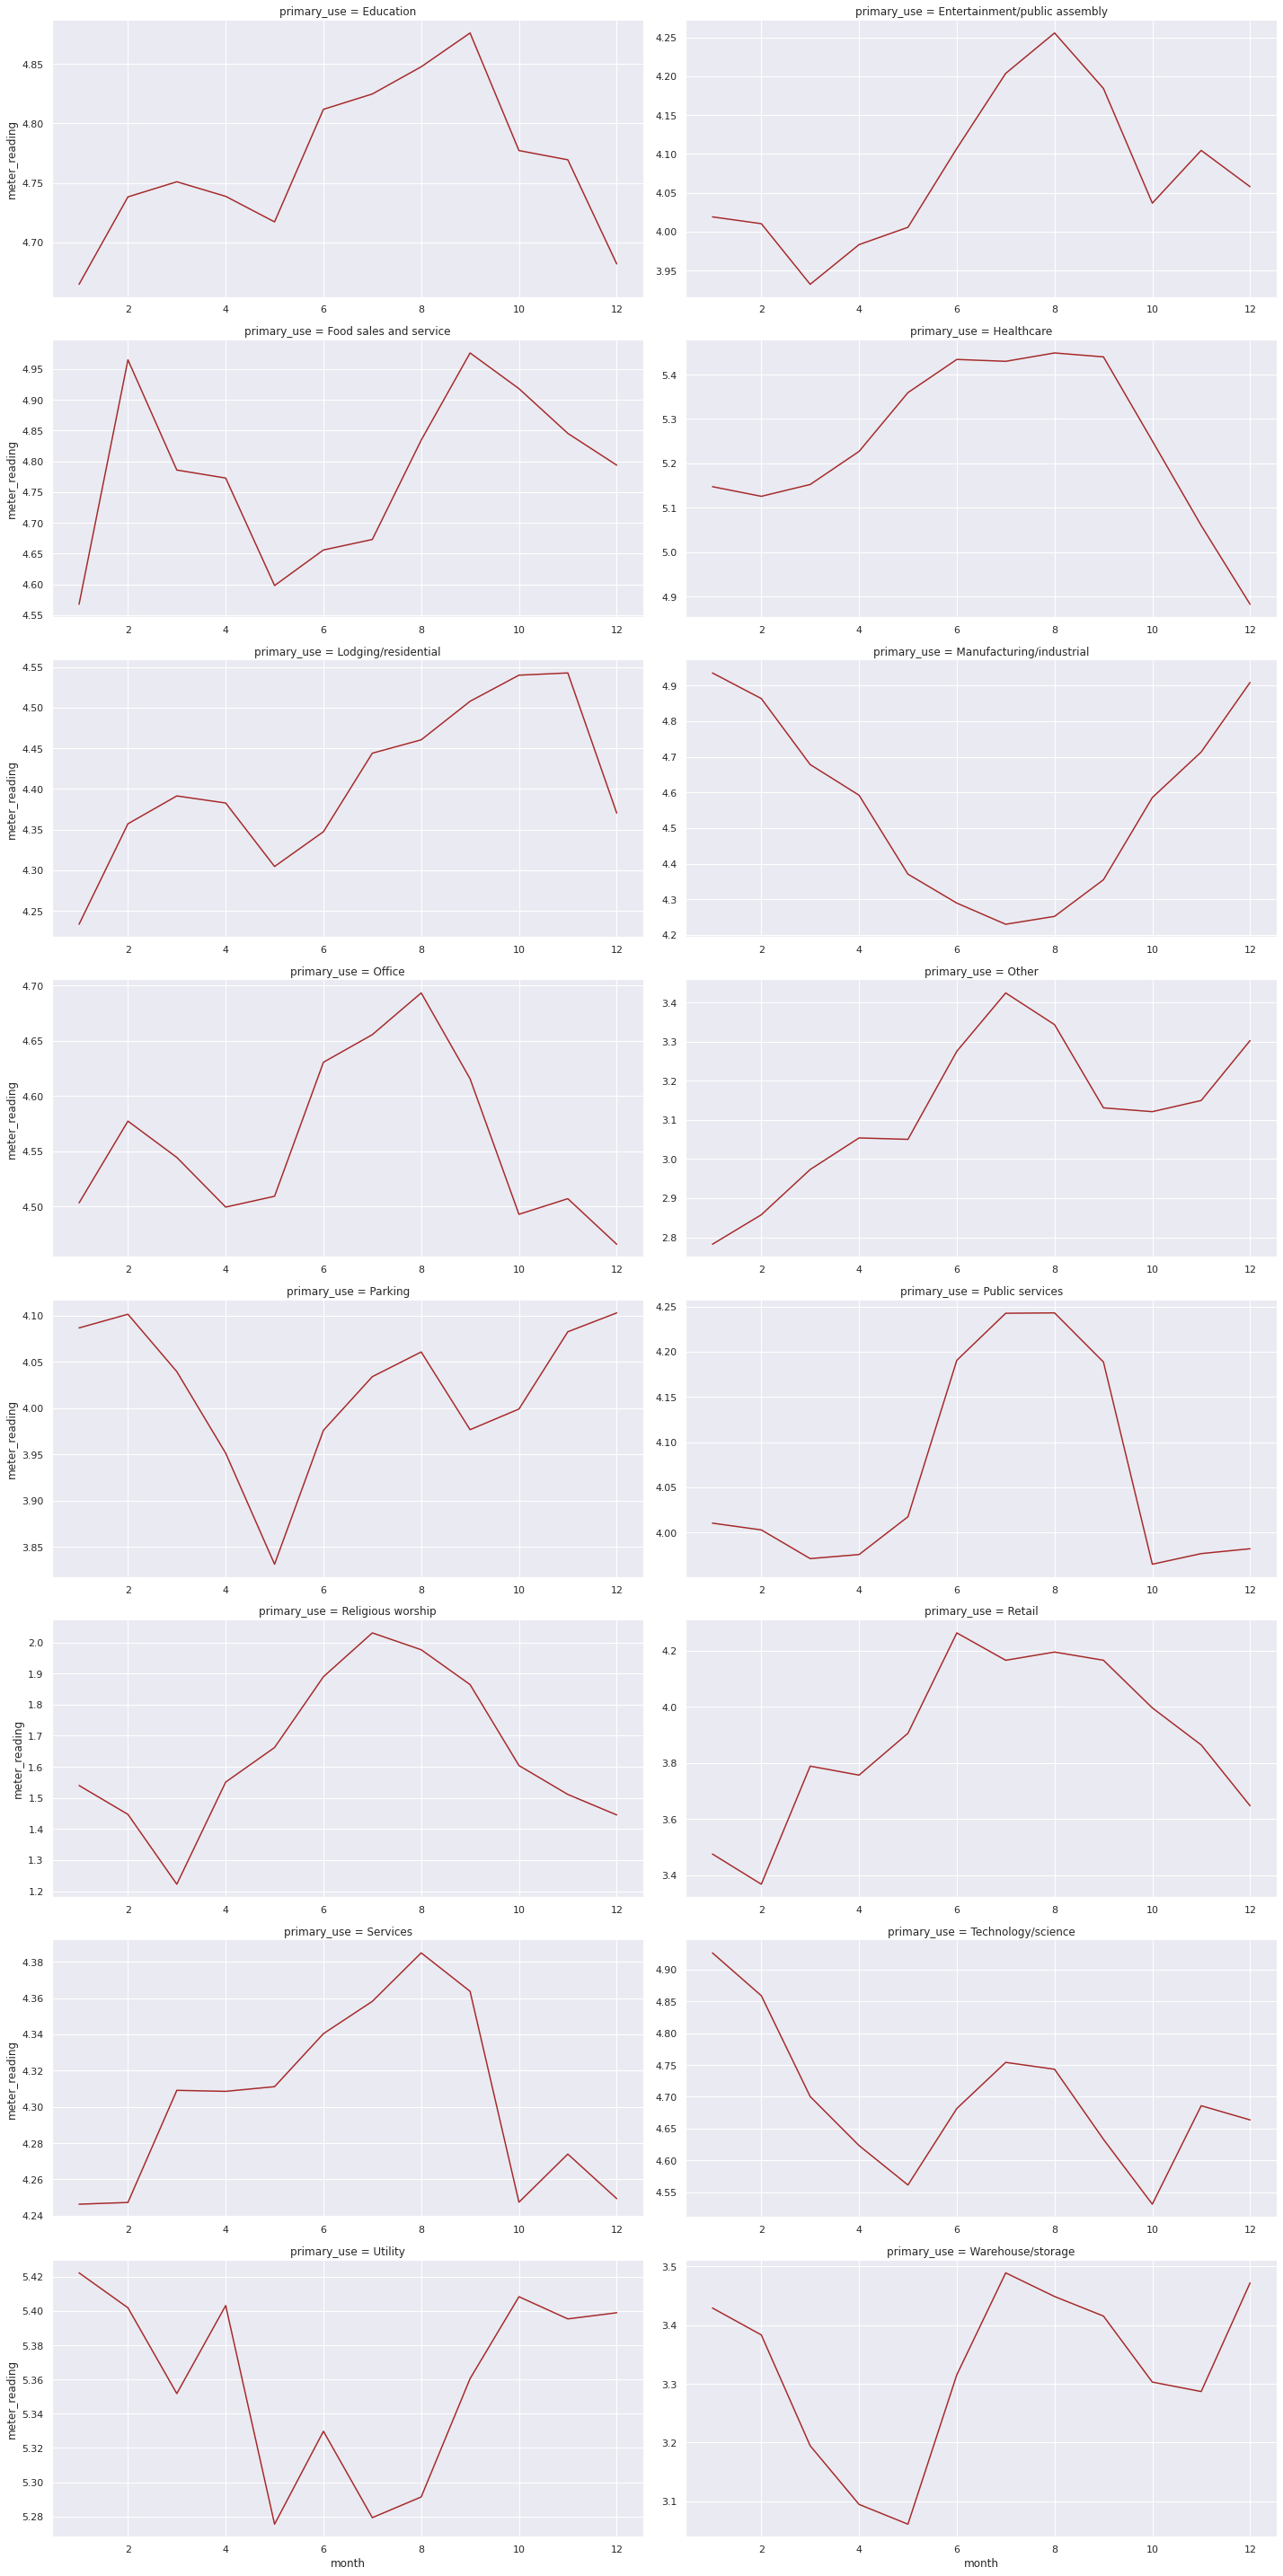

In [89]:
#Pengamatan penggunaan daya tahunan (dilihat dari rataan penggunaan tiap bulannyanya berdasarkan tipe bangunan/pemakaian utama)
day_use_df= df_all_Train2.groupby(['month', 'primary_use']).meter_reading.mean().reset_index()
p=sns.FacetGrid(day_use_df, col='primary_use', col_wrap=2, height=5, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'month', 'meter_reading', color='brown')
plt.show()

Untuk penguunaan daya (pembacaan meter) tahunan, yang cukup sangat berbeda adalah pengguaan pada manufactur dan utility, di mana jika penggunaan secara rata-rata naik di bulan mei-agustus, tapi di tempat ini justru kecil

**9.5. Analisis penggunaan daya (pembacaan meter) terhadap suhu udara dan suhu dew**

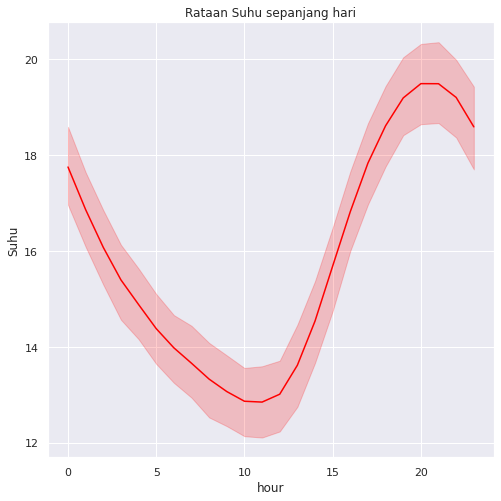

In [90]:
#Melihat rataan suhu secara harian (pada tiap jamnya)
plt.figure(figsize=(8,8))
hour_df= df_all_Train2.groupby(['timestamp','hour']).air_temperature.mean().reset_index()
sns.lineplot(x=hour_df['hour'], y=hour_df['air_temperature'], color='red')
plt.ylabel("Suhu")
plt.title("Rataan Suhu sepanjang hari")
plt.show()

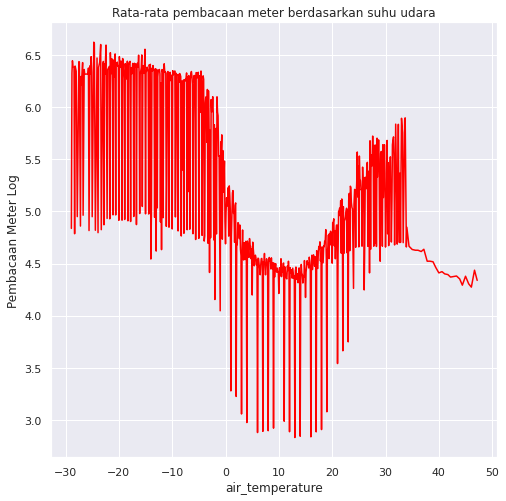

In [91]:
#Melihat pengaruh rataan penggunaan daya (pembacaan meter) terhadap suhu udara
plt.figure(figsize=(8,8))
temp_df= df_all_Train2.groupby('air_temperature').meter_reading.mean().reset_index()
sns.lineplot(x=temp_df['air_temperature'], y=temp_df['meter_reading'], color='red')
plt.ylabel("Pembacaan Meter Log")
plt.title("Rata-rata pembacaan meter berdasarkan suhu udara")
plt.show()

Pembacaan meter rata-rata tinggi disaat suhu negatif (kemungkinan pemakaian daya meningkat untuk mesin pemanas), dan kemudian cukup tinggi di saat suhu naik di atas 15 derajat C (kemungkinan pemakain Pendingin atau AC).

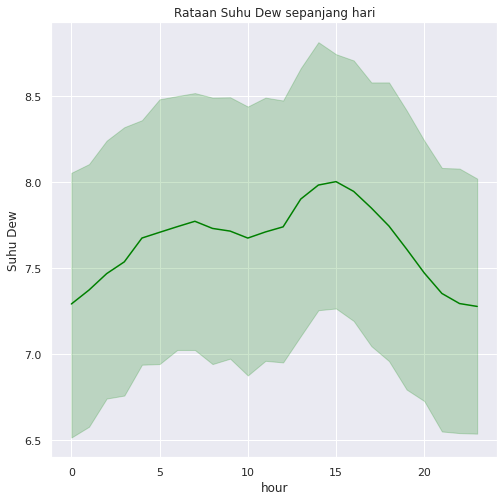

In [92]:
#Melihat rataan suhu dew secara harian (pada tiap jamnya)
plt.figure(figsize=(8,8))
hour_df= df_all_Train2.groupby(['timestamp','hour']).dew_temperature.mean().reset_index()
sns.lineplot(x=hour_df['hour'], y=hour_df['dew_temperature'], color='green')
plt.ylabel("Suhu Dew")
plt.title("Rataan Suhu Dew sepanjang hari")
plt.show()

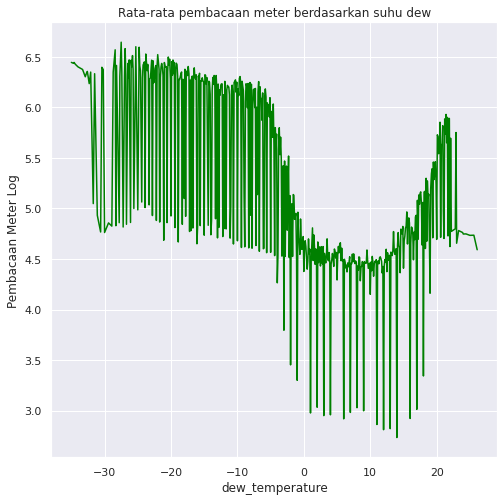

In [93]:
#Melihat pengaruh rataan penggunaan daya (pembacaan meter) terhadap suhu dew
plt.figure(figsize=(8,8))
temp_df= df_all_Train2.groupby('dew_temperature').meter_reading.mean().reset_index()
sns.lineplot(x=temp_df['dew_temperature'], y=temp_df['meter_reading'], color='green')
plt.ylabel("Pembacaan Meter Log")
plt.title("Rata-rata pembacaan meter berdasarkan suhu dew")
plt.show()

Seperti pada hubungan rataan pembacaan dengan suhu udara, rataan pembacaan meter pada suhu dew juga memiliki rata-rata tinggi disaat suhu negatif, dan kemudian cukup tinggi di saat suhu naik di atas 15 derajat C

# **10. Hasil Preprocessing**

In [94]:
df_all_Train2.to_csv('/content/Data_Hasil_Preprocessing_Train.csv', encoding='utf8')
df_all_Test.to_csv('/content/Data_Hasil_Preprocessing_Test.csv', encoding='utf8')